In [1]:
import os

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from plot_ccmp_netcdf import read_ccmp
from datetime import datetime


In [2]:
ccmp = read_ccmp('2.1')
ccmp.read_nc('20210501')
ccmp.hours

v02.1.NRT/Y2021/M05/CCMP_RT_Wind_Analysis_20210501_V02.1_L3.0_RSS.nc


['00Z', '06Z', '12Z', '18Z']

### Correlation adjustment  (Vmsat2Vm)

In [3]:
def Vmsat2Vm(Vmsat):
    Vm = 0.8*Vmsat +0.66
    return Vm

### get sattelite wind and adjust 

In [4]:
def get_Vms_obs(str_bdate,str_edate):
    bdate = datetime.strptime(str_bdate,'%Y%m%d')
    edate = datetime.strptime(str_edate,'%Y%m%d')

    icount=0
    for adate in pd.date_range(bdate,edate,freq='24H'):
        idate = adate.strftime('%Y%m%d')
        ccmp.read_nc(idate)
        if not ccmp.file_exist:
            print('Warning file NOT exist')
        tmp=[]
        for i,ihours in enumerate(ccmp.hours):
            data_out = Vmsat2Vm(ccmp.data)

    return data_out

In [5]:
str_bdate='20210604'
str_edate='20210604'

In [6]:
Vmsdata = get_Vms_obs(str_bdate,str_edate)

v02.1.NRT/Y2021/M06/CCMP_RT_Wind_Analysis_20210604_V02.1_L3.0_RSS.nc


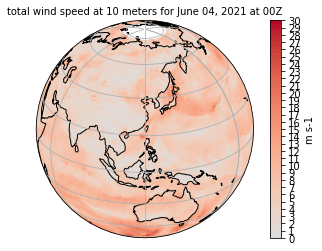

In [7]:
ccmp.plot_map(str_bdate,ccmp.hours[0],ccmp.data,'_ori')

### Vm2H

In [ ]:
def Vm2H(Vm):
    H=0.02*Vm**2+0.79
    return H

In [ ]:
H10 = Vm2H(Vmsdata)

In [ ]:
for i in [0,1,2,3]:
    ccmp.plot_Vmsat(str_bdate,ccmp.hours[i],Vmsdata,cmap='YlOrRd')

In [ ]:
for i in [0,1,2,3]:
    ccmp.plot_H10(str_bdate,ccmp.hours[i],H10,cmap='twilight')

### Power law adjustment

In [12]:
def u10tou2(u10,p):
    u2 = u10*(0.2**p)
    return u2

### get sattelite wind and adjust 

In [ ]:
def get_Vms_obs(str_bdate,str_edate):
    bdate = datetime.strptime(str_bdate,'%Y%m%d')
    edate = datetime.strptime(str_edate,'%Y%m%d')

    icount=0
    for adate in pd.date_range(bdate,edate,freq='24H'):
        idate = adate.strftime('%Y%m%d')
        ccmp.read_nc(idate)
        if not ccmp.file_exist:
            continue
        tmp=[]
        for i,ihours in enumerate(ccmp.hours):
            data_out = u10tou2(ccmp.data,0.08)

    return data_out

In [ ]:
Vmsadjdata = get_Vms_obs(str_bdate,str_edate)

In [ ]:
diff = Vmsadjdata-ccmp.data

In [ ]:
#ccmp.plot_map_diff(str_bdate,ccmp.hours[0],diff,'_diff')

In [ ]:
#ccmp.plot_map(str_bdate,ccmp.hours[0],Vmsadjdata,'_adj')

In [ ]:
#ccmp.plot_map(str_bdate,ccmp.hours[0],ccmp.data,'_ori')

In [ ]:
for i in [0,1,2,3]:
    ccmp.plot_Vmsat(str_bdate,ccmp.hours[i],Vmsadjdata,cmap='YlOrRd',subfix='_PwrLawAdj')

### new Significant Wave Height estimation after adjustment

#### Phase 1 - Statisitic 

In [ ]:
def Vmsat2Vm(Vmsat):
    Vm = 0.904*Vmsat +0.664
    return Vm

In [ ]:
def get_Vms_obs(str_bdate,str_edate):
    bdate = datetime.strptime(str_bdate,'%Y%m%d')
    edate = datetime.strptime(str_edate,'%Y%m%d')

    icount=0
    for adate in pd.date_range(bdate,edate,freq='24H'):
        idate = adate.strftime('%Y%m%d')
        ccmp.read_nc(idate)
        if not ccmp.file_exist:
            continue
        tmp=[]
        #for i,ihours in enumerate(ccmp.hours):
        data_out = Vmsat2Vm(u10tou2(ccmp.data,0.08))

    return data_out

In [ ]:
Vmsadjdata = get_Vms_obs(str_bdate,str_edate)

In [ ]:
H10adj = Vm2H(Vmsadjdata)

In [ ]:
for i in [0,1,2,3]:
    ccmp.plot_H10(str_bdate,ccmp.hours[i],H10adj,cmap='twilight',subfix='_adj')

In [ ]:
for i in [0,1,2,3]:
    ccmp.plot_H10(str_bdate,ccmp.hours[i],(H10adj-H10),cmap='twilight',subfix='_Hdiff',vmax=0.001,vmin=-0.15,interval=0.005)

####  Phase2 - Machine Learning

In [8]:
import tensorflow as tf
linear_model = tf.keras.models.load_model('../ai/saved_model/Vmsat_H_Vm_model')
dnn_model    = tf.keras.models.load_model('../ai/saved_model/Vmsat_H_ddn_Vm_model')
dnn_model_s1 = tf.keras.models.load_model('../ai/saved_model/Vmsat_Vm_ddn_Vmsat_model')
dnn_model_s2 = tf.keras.models.load_model('../ai/saved_model/Vm_H_ddn_Vm_model')

# Check its architecture
linear_model.summary()
dnn_model.summary()
dnn_model_s1.summary()
dnn_model_s2.summary()

2022-06-05 20:55:24.709938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64) 

### TSWP

In [9]:
def Vmsat2H(Vmsat):
    #Vm = linear_model.predict(pd.DataFrame(Vmsat))
    #Vm = dnn_model.predict(pd.DataFrame(Vmsat))
    Vm = dnn_model_s2.predict(dnn_model_s1.predict(Vmsat))
    return Vm

In [10]:
def get_Vms_obs(str_bdate,str_edate):
    bdate = datetime.strptime(str_bdate,'%Y%m%d')
    edate = datetime.strptime(str_edate,'%Y%m%d')

    icount=0
    for adate in pd.date_range(bdate,edate,freq='24H'):
        idate = adate.strftime('%Y%m%d')
        ccmp.read_nc(idate)
        if not ccmp.file_exist:
            continue
        tmp=[]
        #for i,ihours in enumerate(ccmp.hours):
        shape=u10tou2(ccmp.data,0.08).shape
        data_out = Vmsat2H(np.reshape(u10tou2(ccmp.data,0.08),(shape[0]*shape[1]*shape[2])))
        data_out = np.reshape(data_out,shape)
        
    return data_out

In [13]:
H_DNN = get_Vms_obs(str_bdate,str_edate)

v02.1.NRT/Y2021/M06/CCMP_RT_Wind_Analysis_20210604_V02.1_L3.0_RSS.nc
113040/113040 [==============================] - 192s 2ms/step


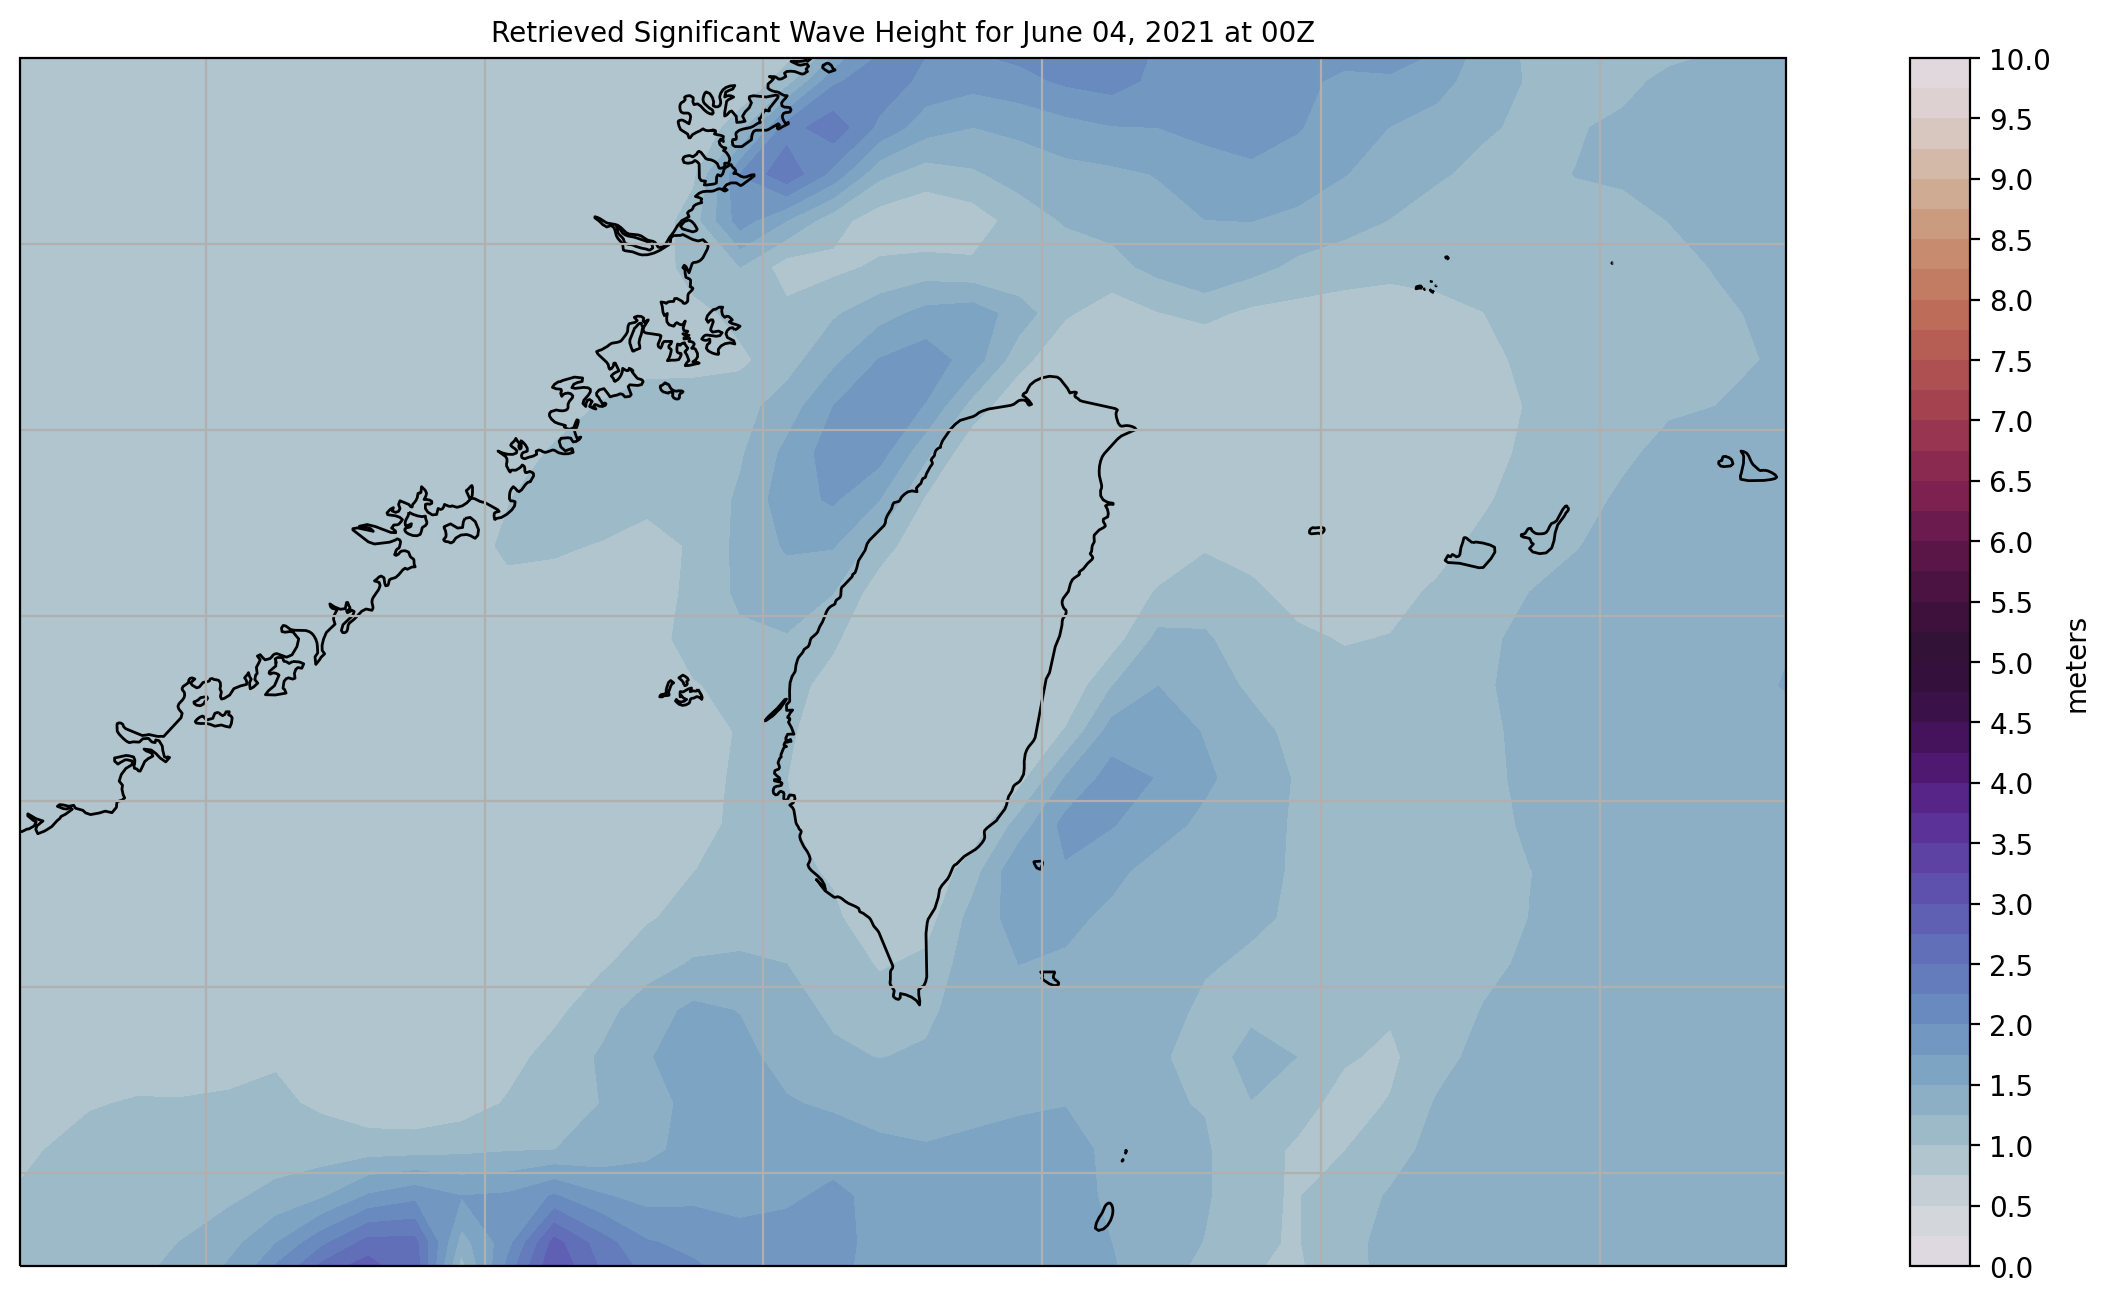

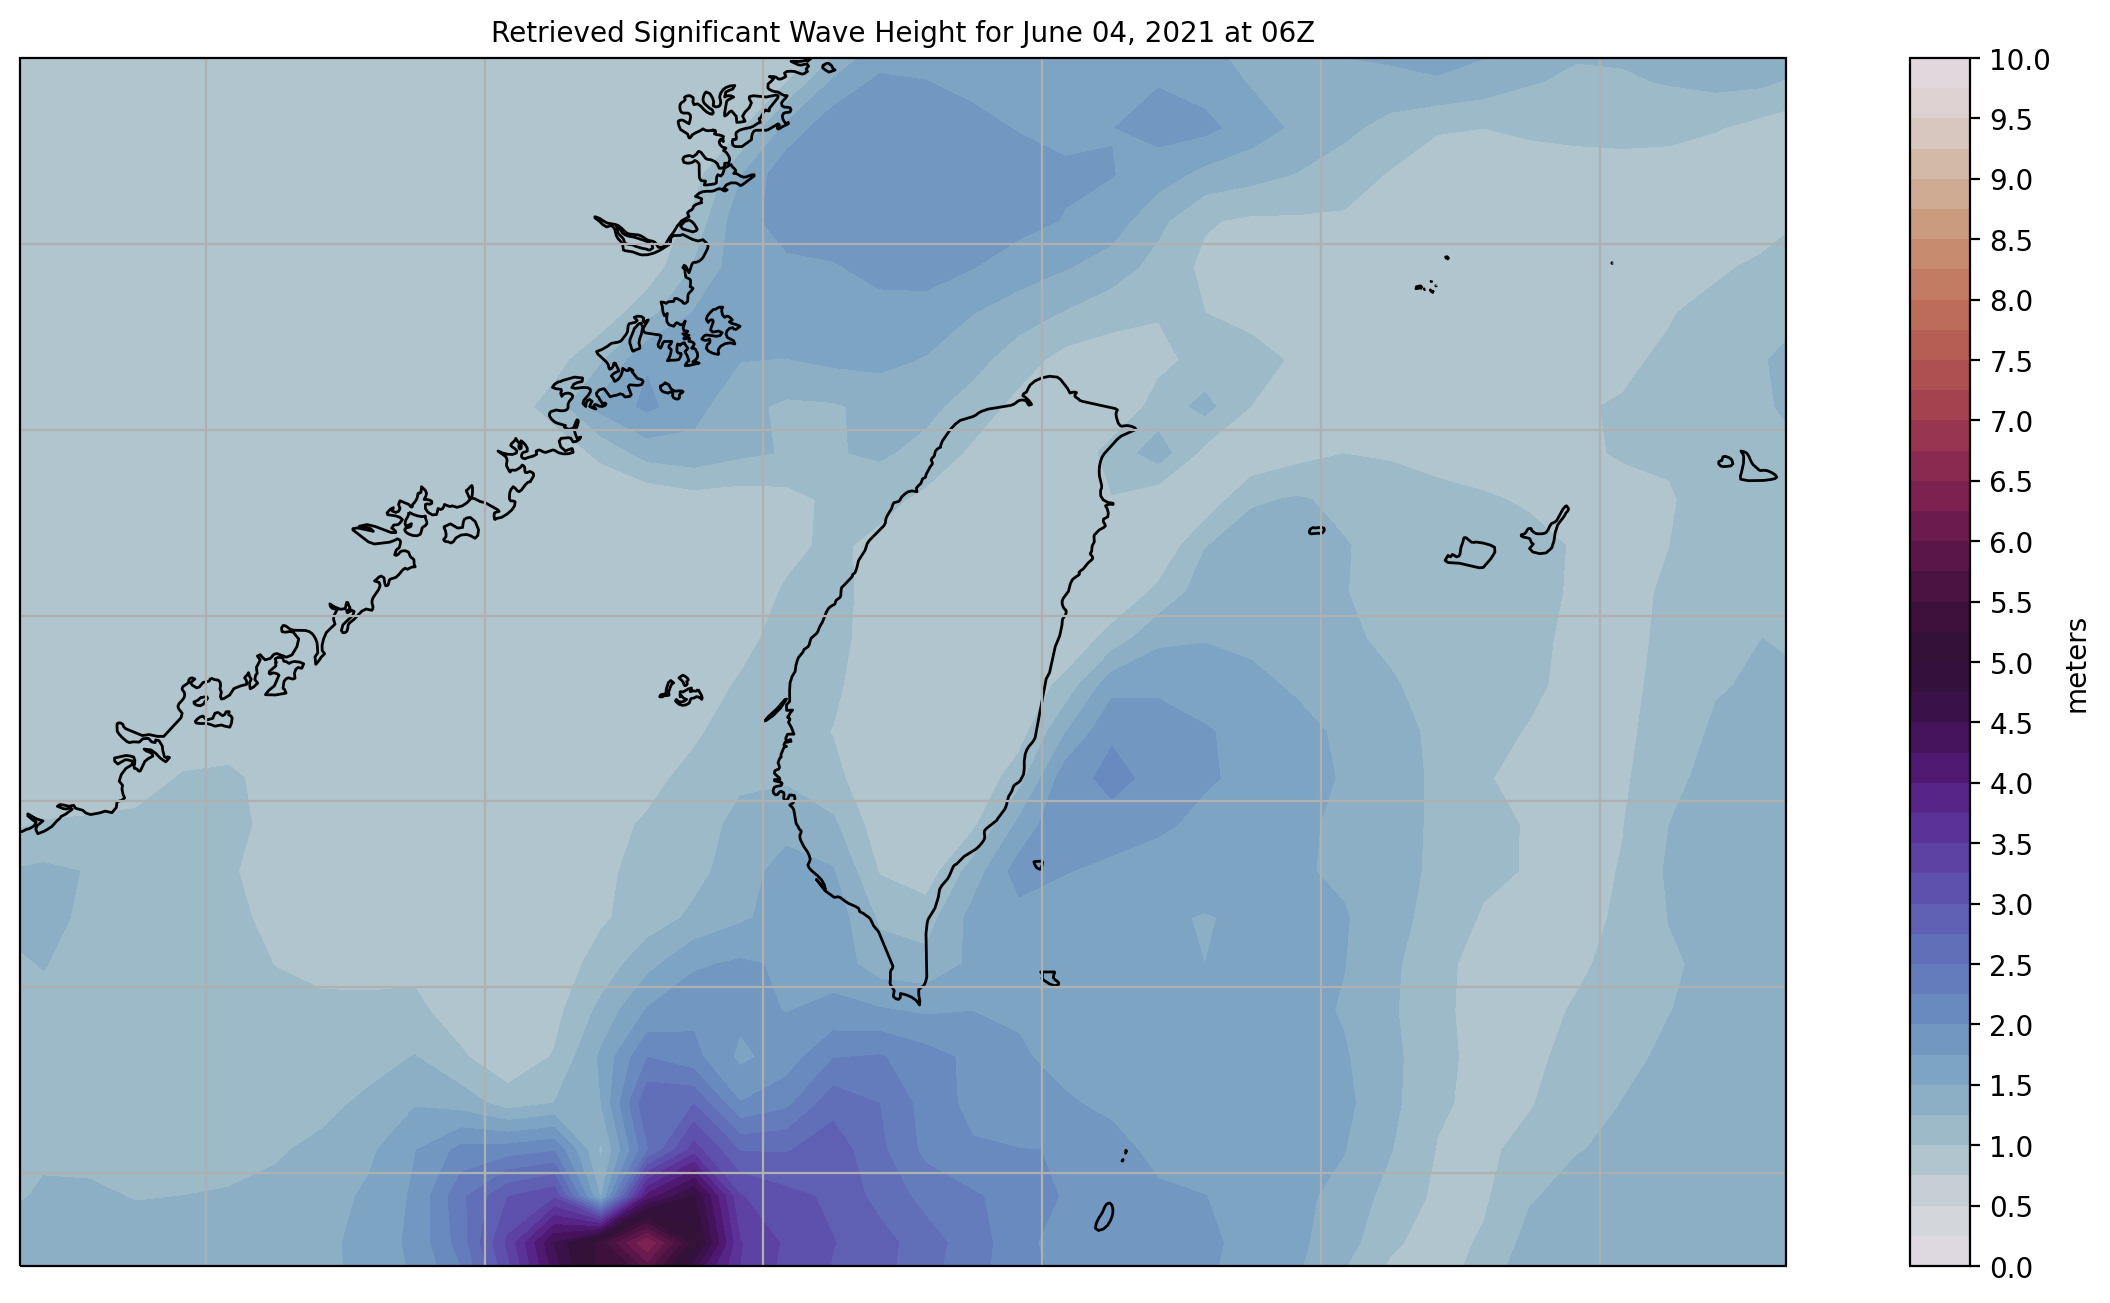

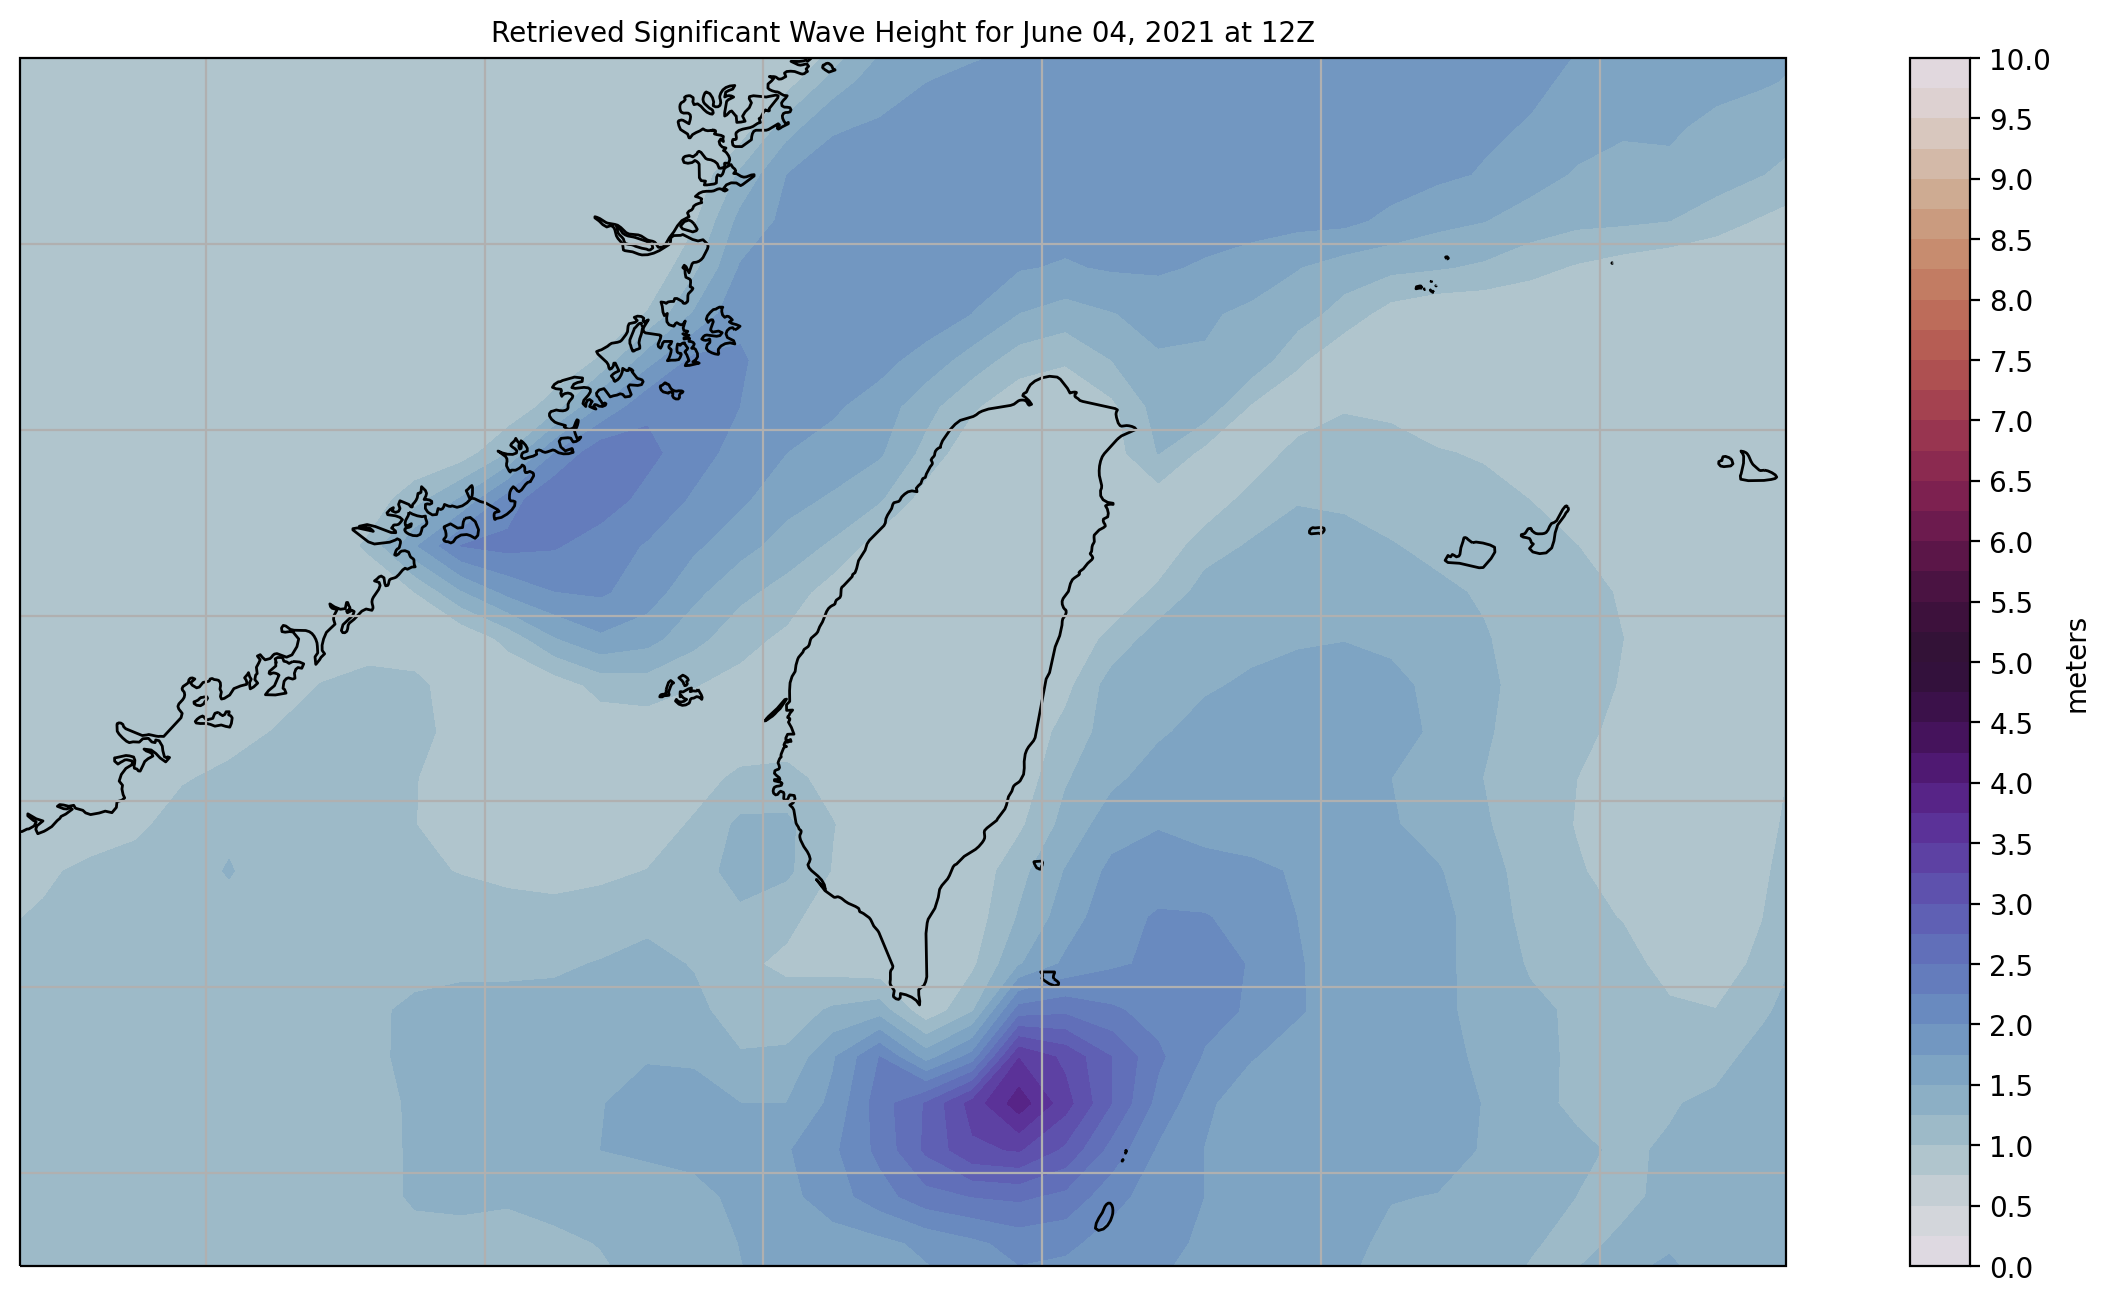

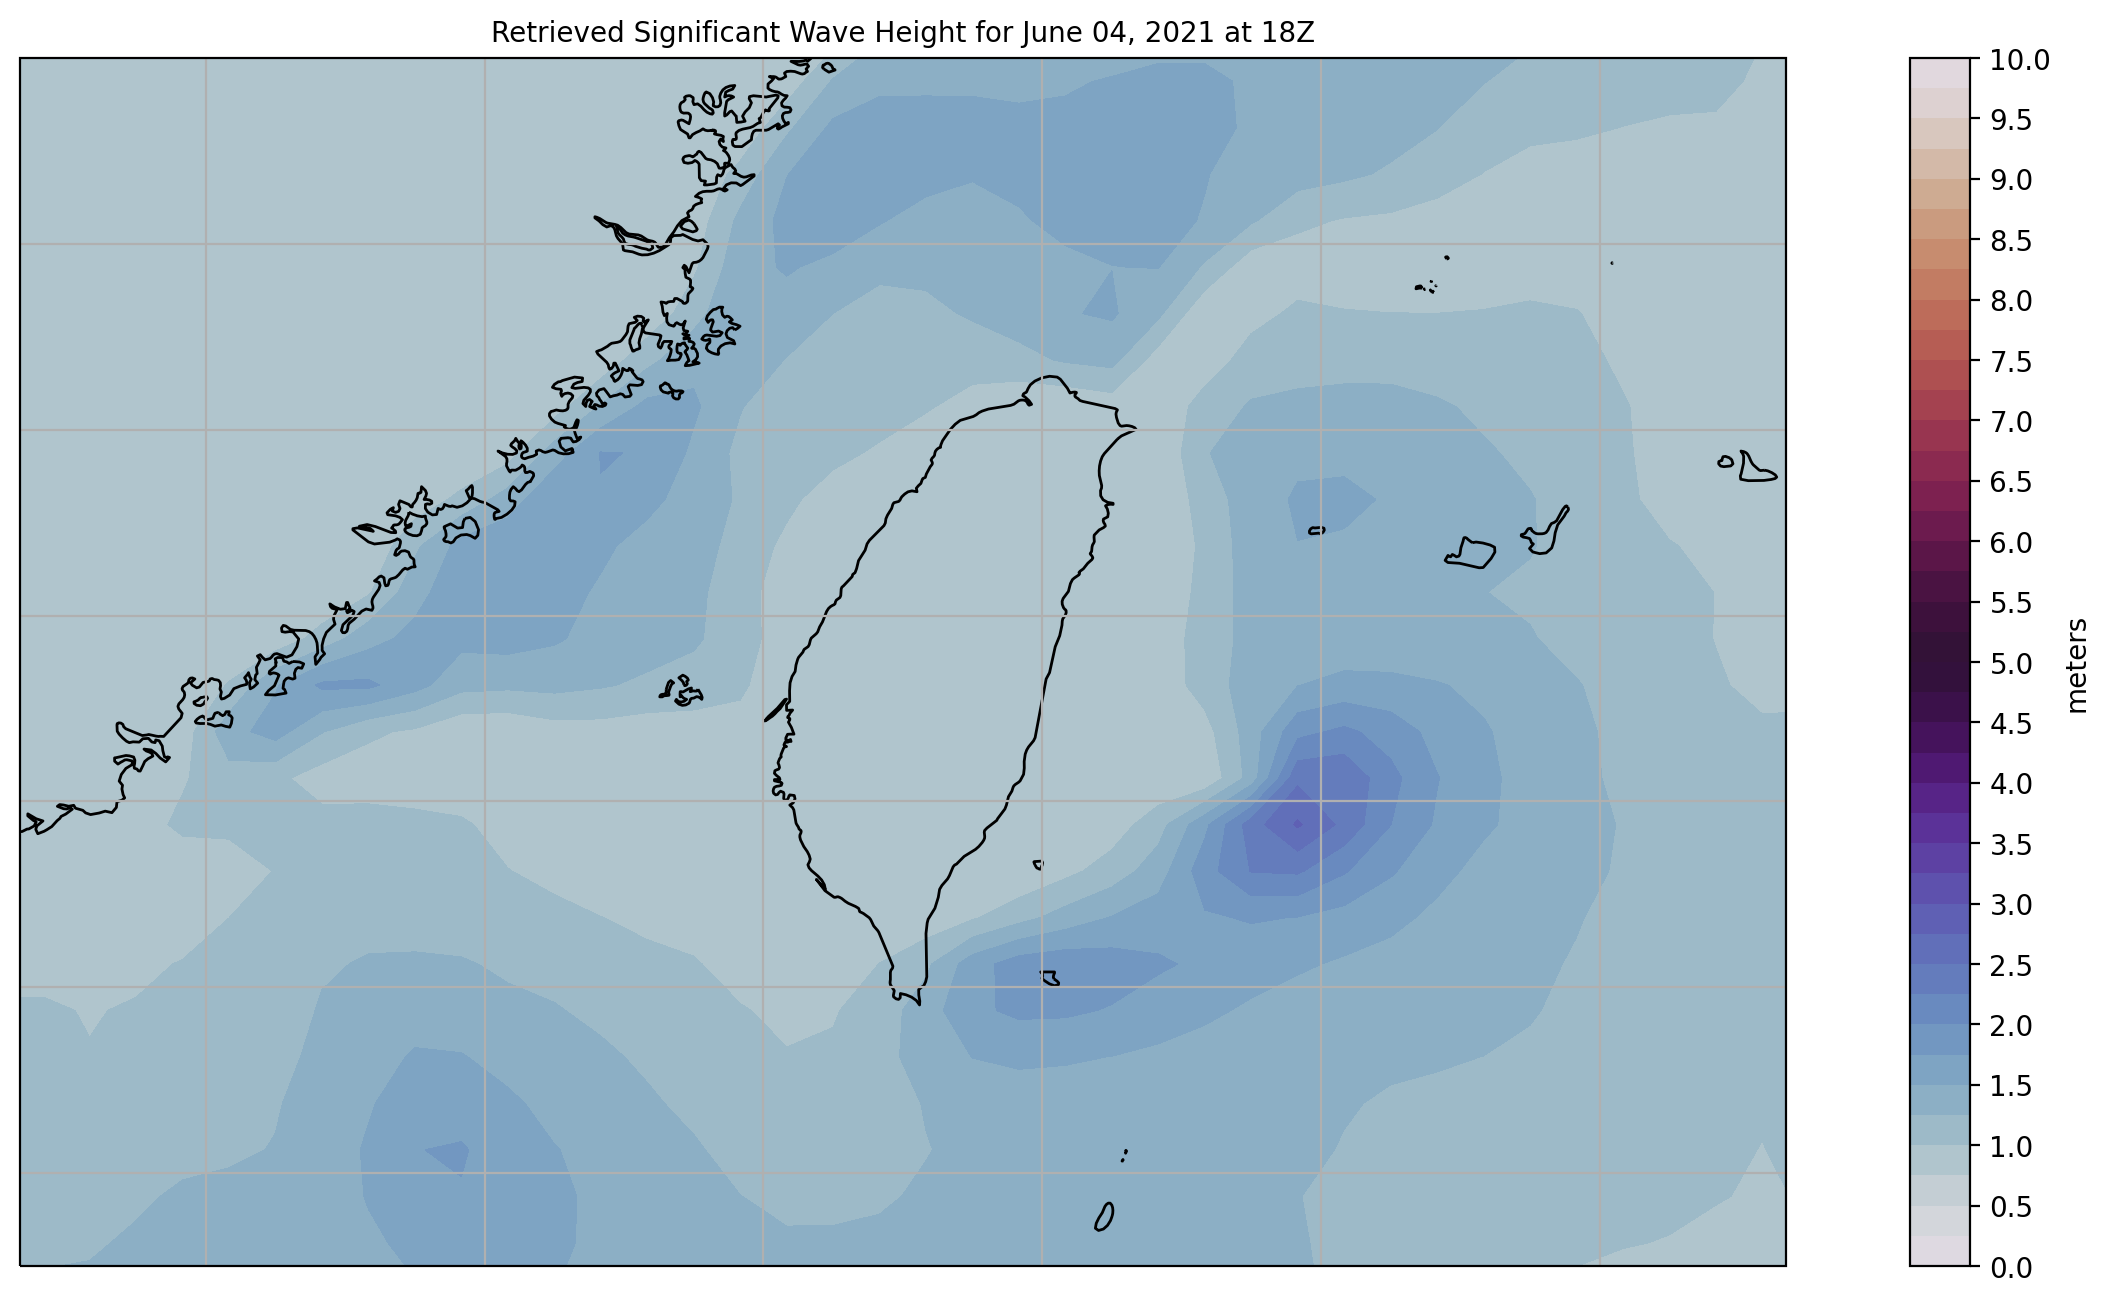

In [14]:
for i in [0,1,2,3]:
    ccmp.plot_H10(str_bdate,ccmp.hours[i],H_DNN,cmap='twilight',subfix='_adj')

### OSWP

In [15]:
def Vmsat2H(Vmsat):
    #Vm = linear_model.predict(pd.DataFrame(Vmsat))
    Vm = dnn_model.predict(pd.DataFrame(Vmsat))
    #Vm = dnn_model_s2.predict(dnn_model_s1.predict(Vmsat))
    return Vm

In [16]:
H_DNN = get_Vms_obs(str_bdate,str_edate)

v02.1.NRT/Y2021/M06/CCMP_RT_Wind_Analysis_20210604_V02.1_L3.0_RSS.nc
113040/113040 [==============================] - 230s 2ms/step


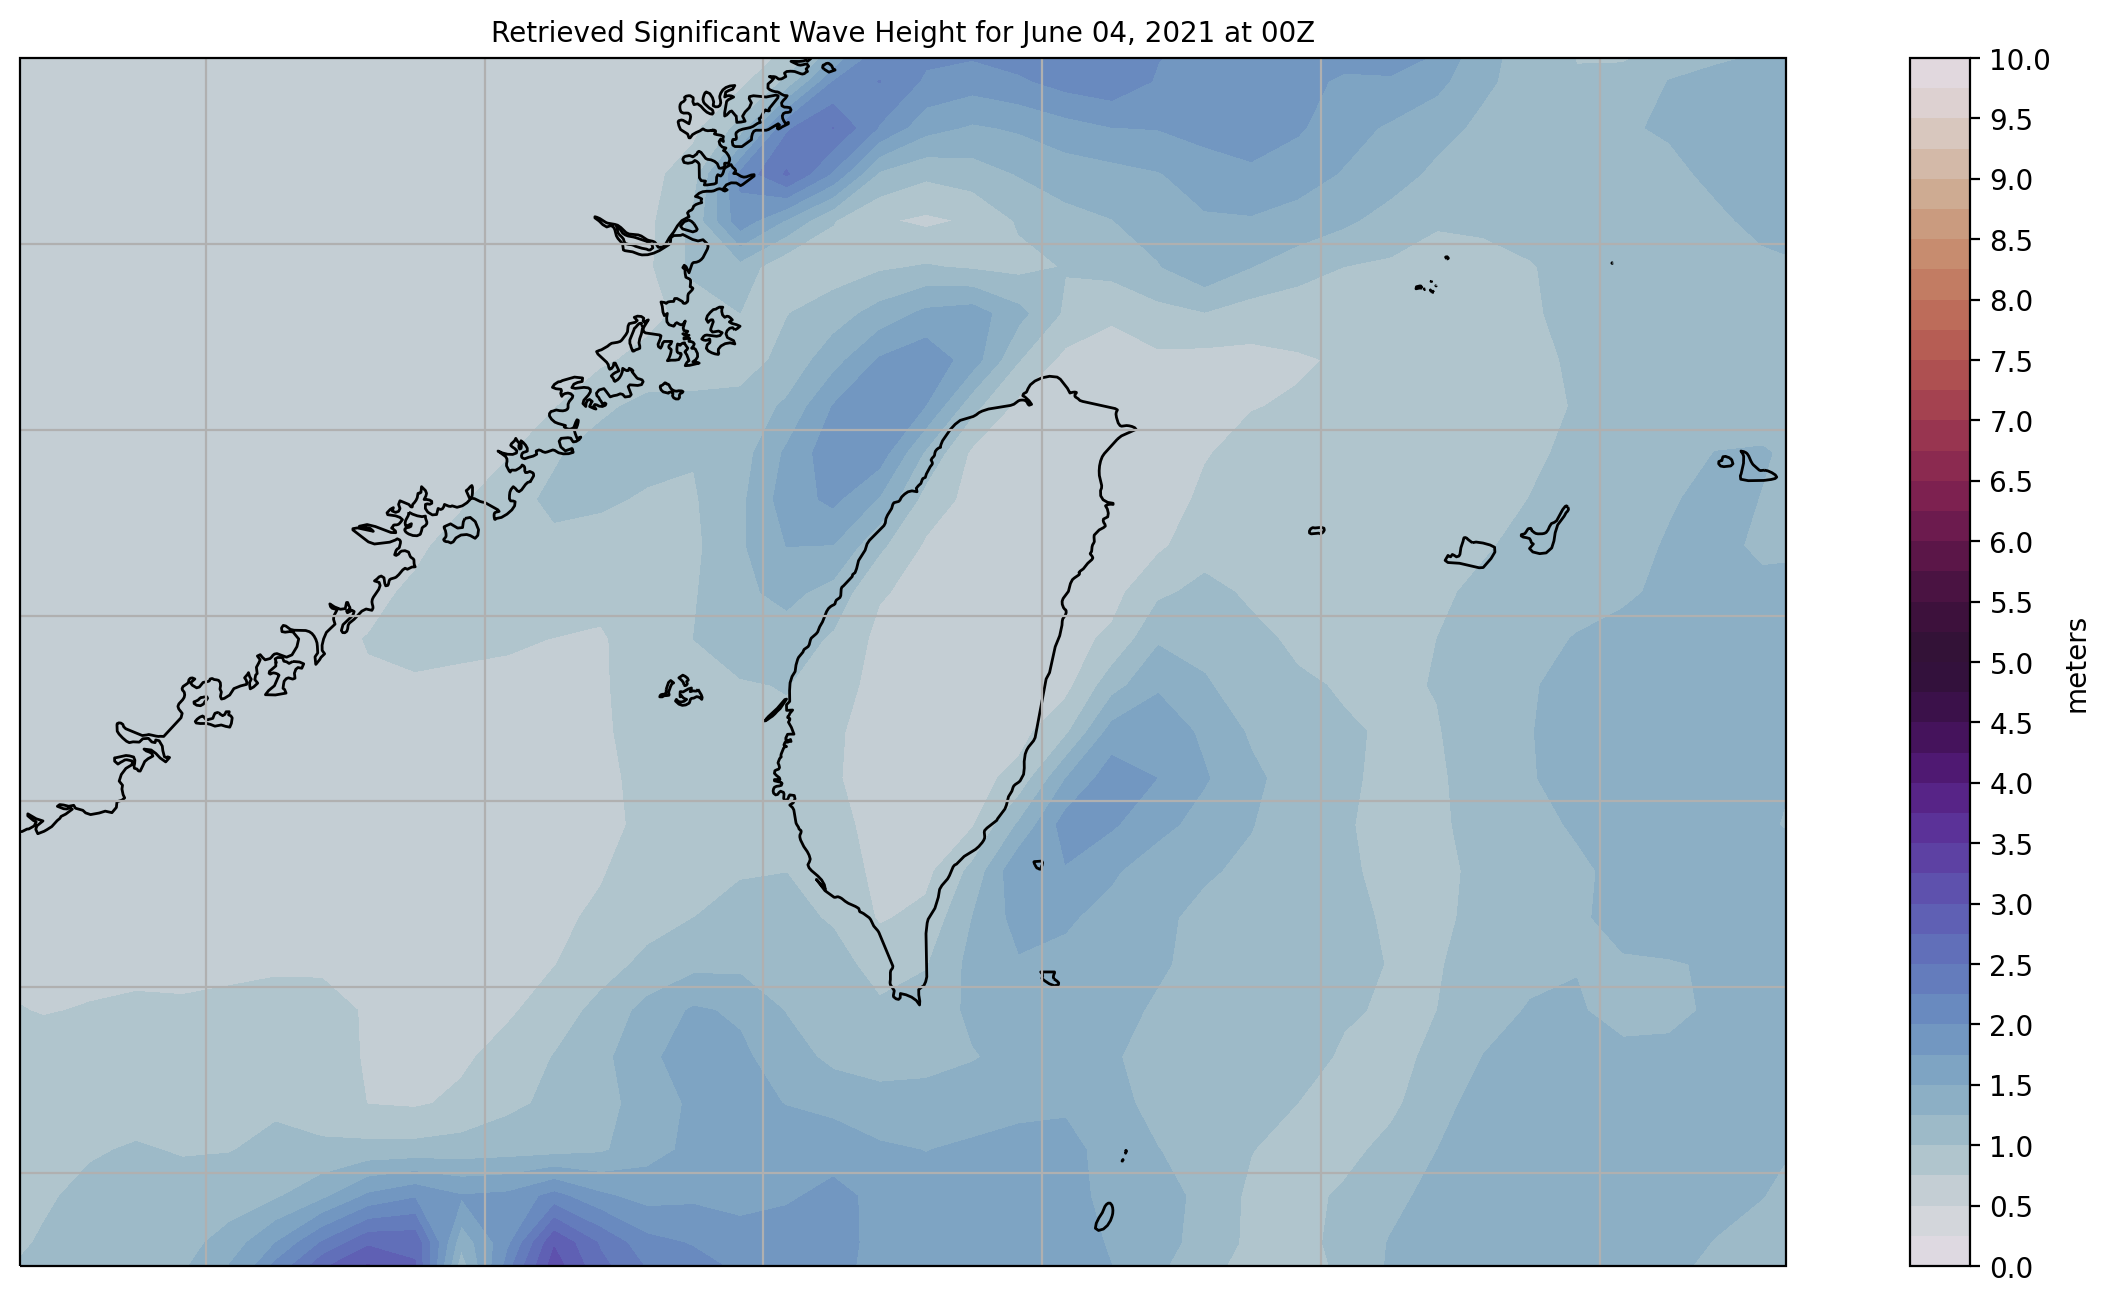

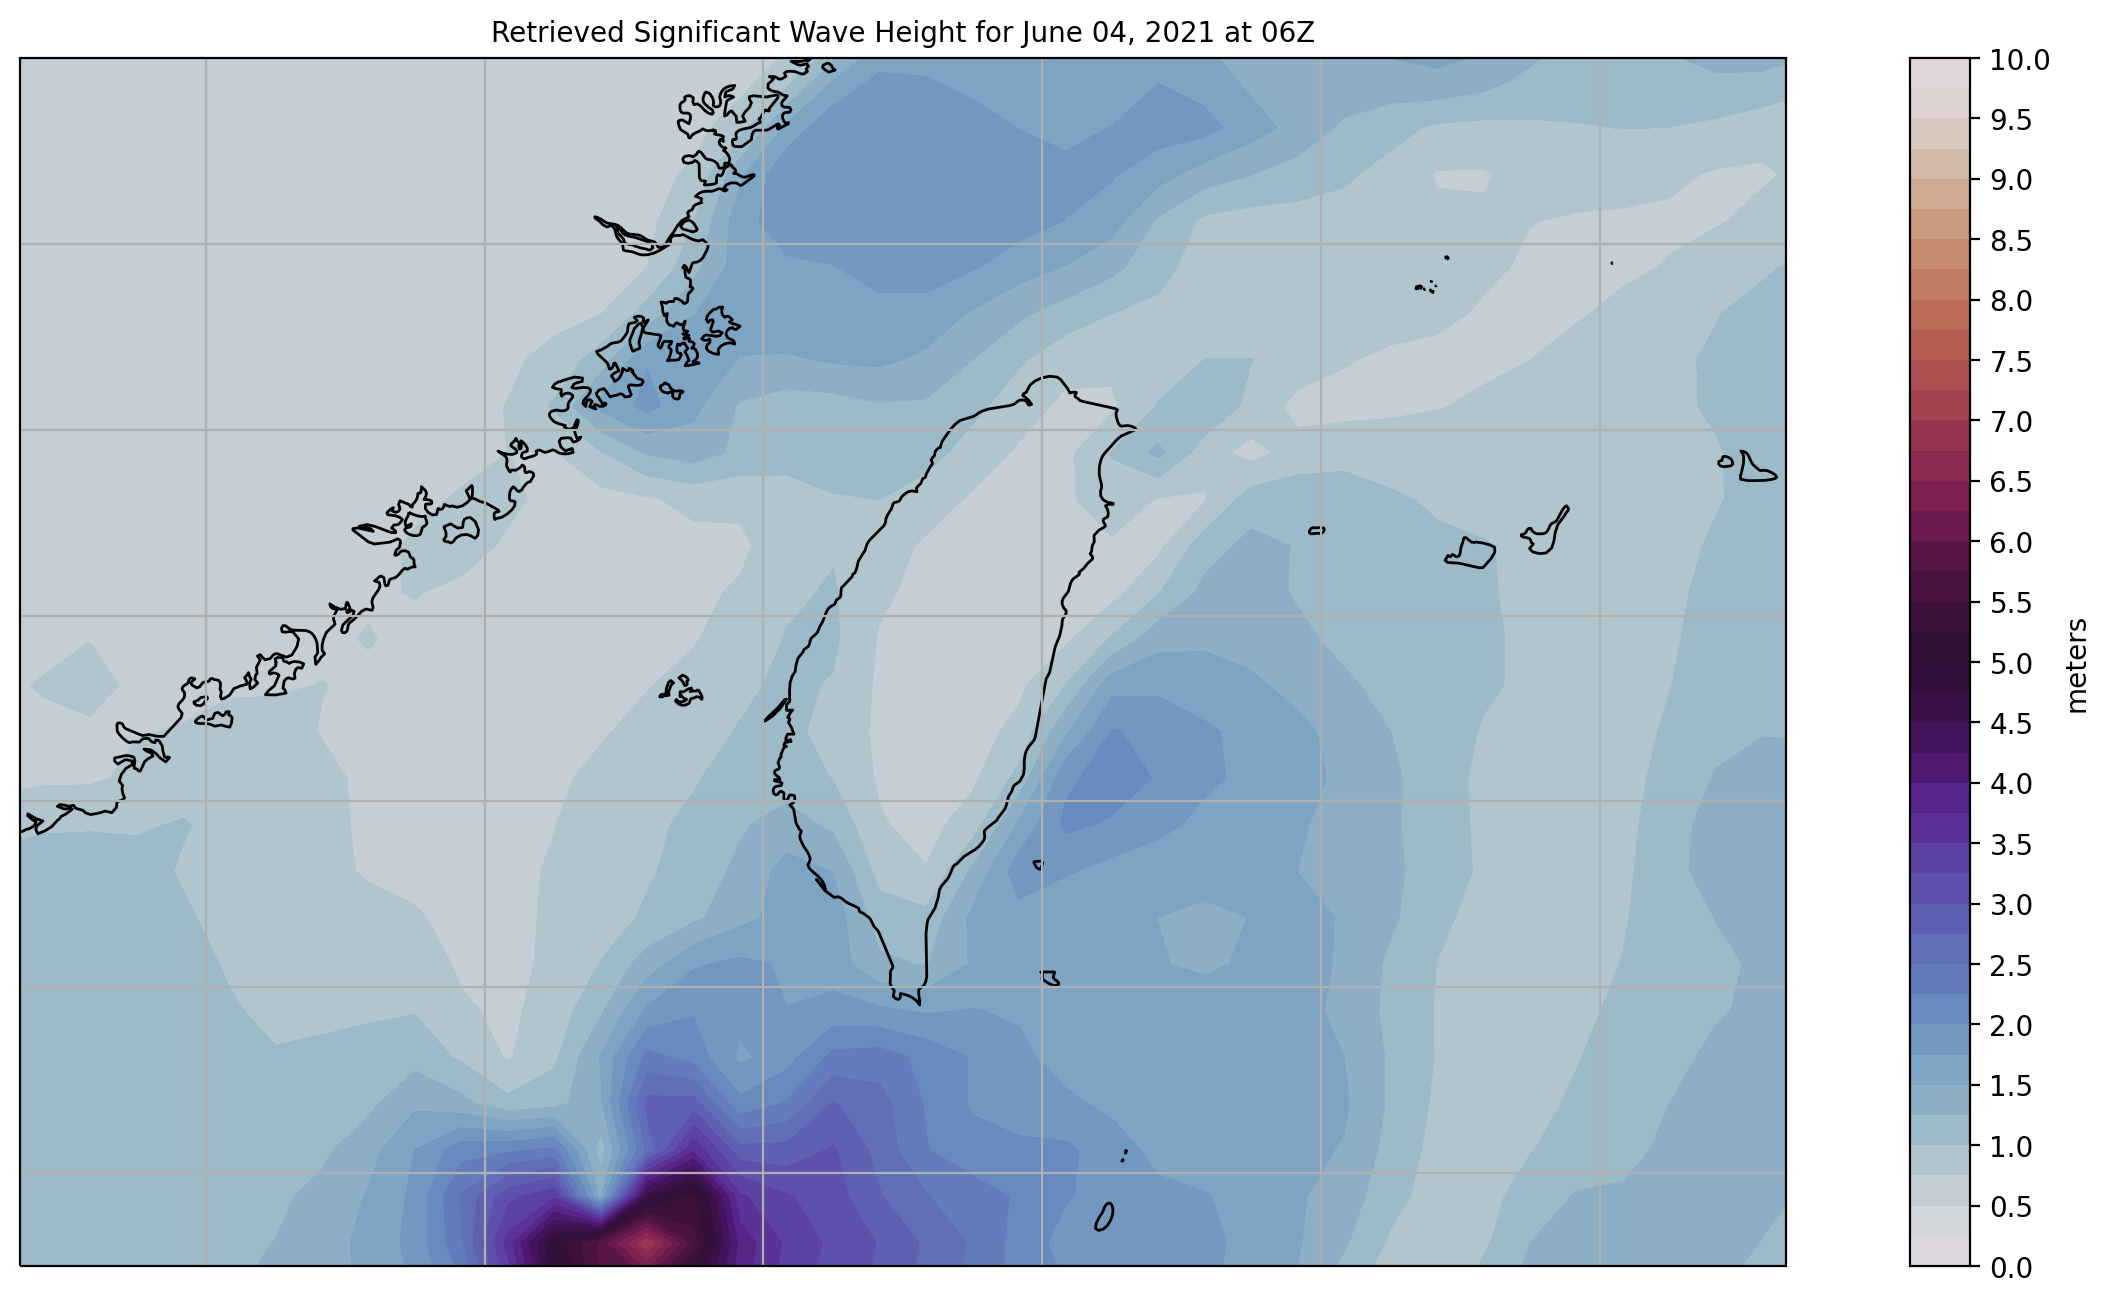

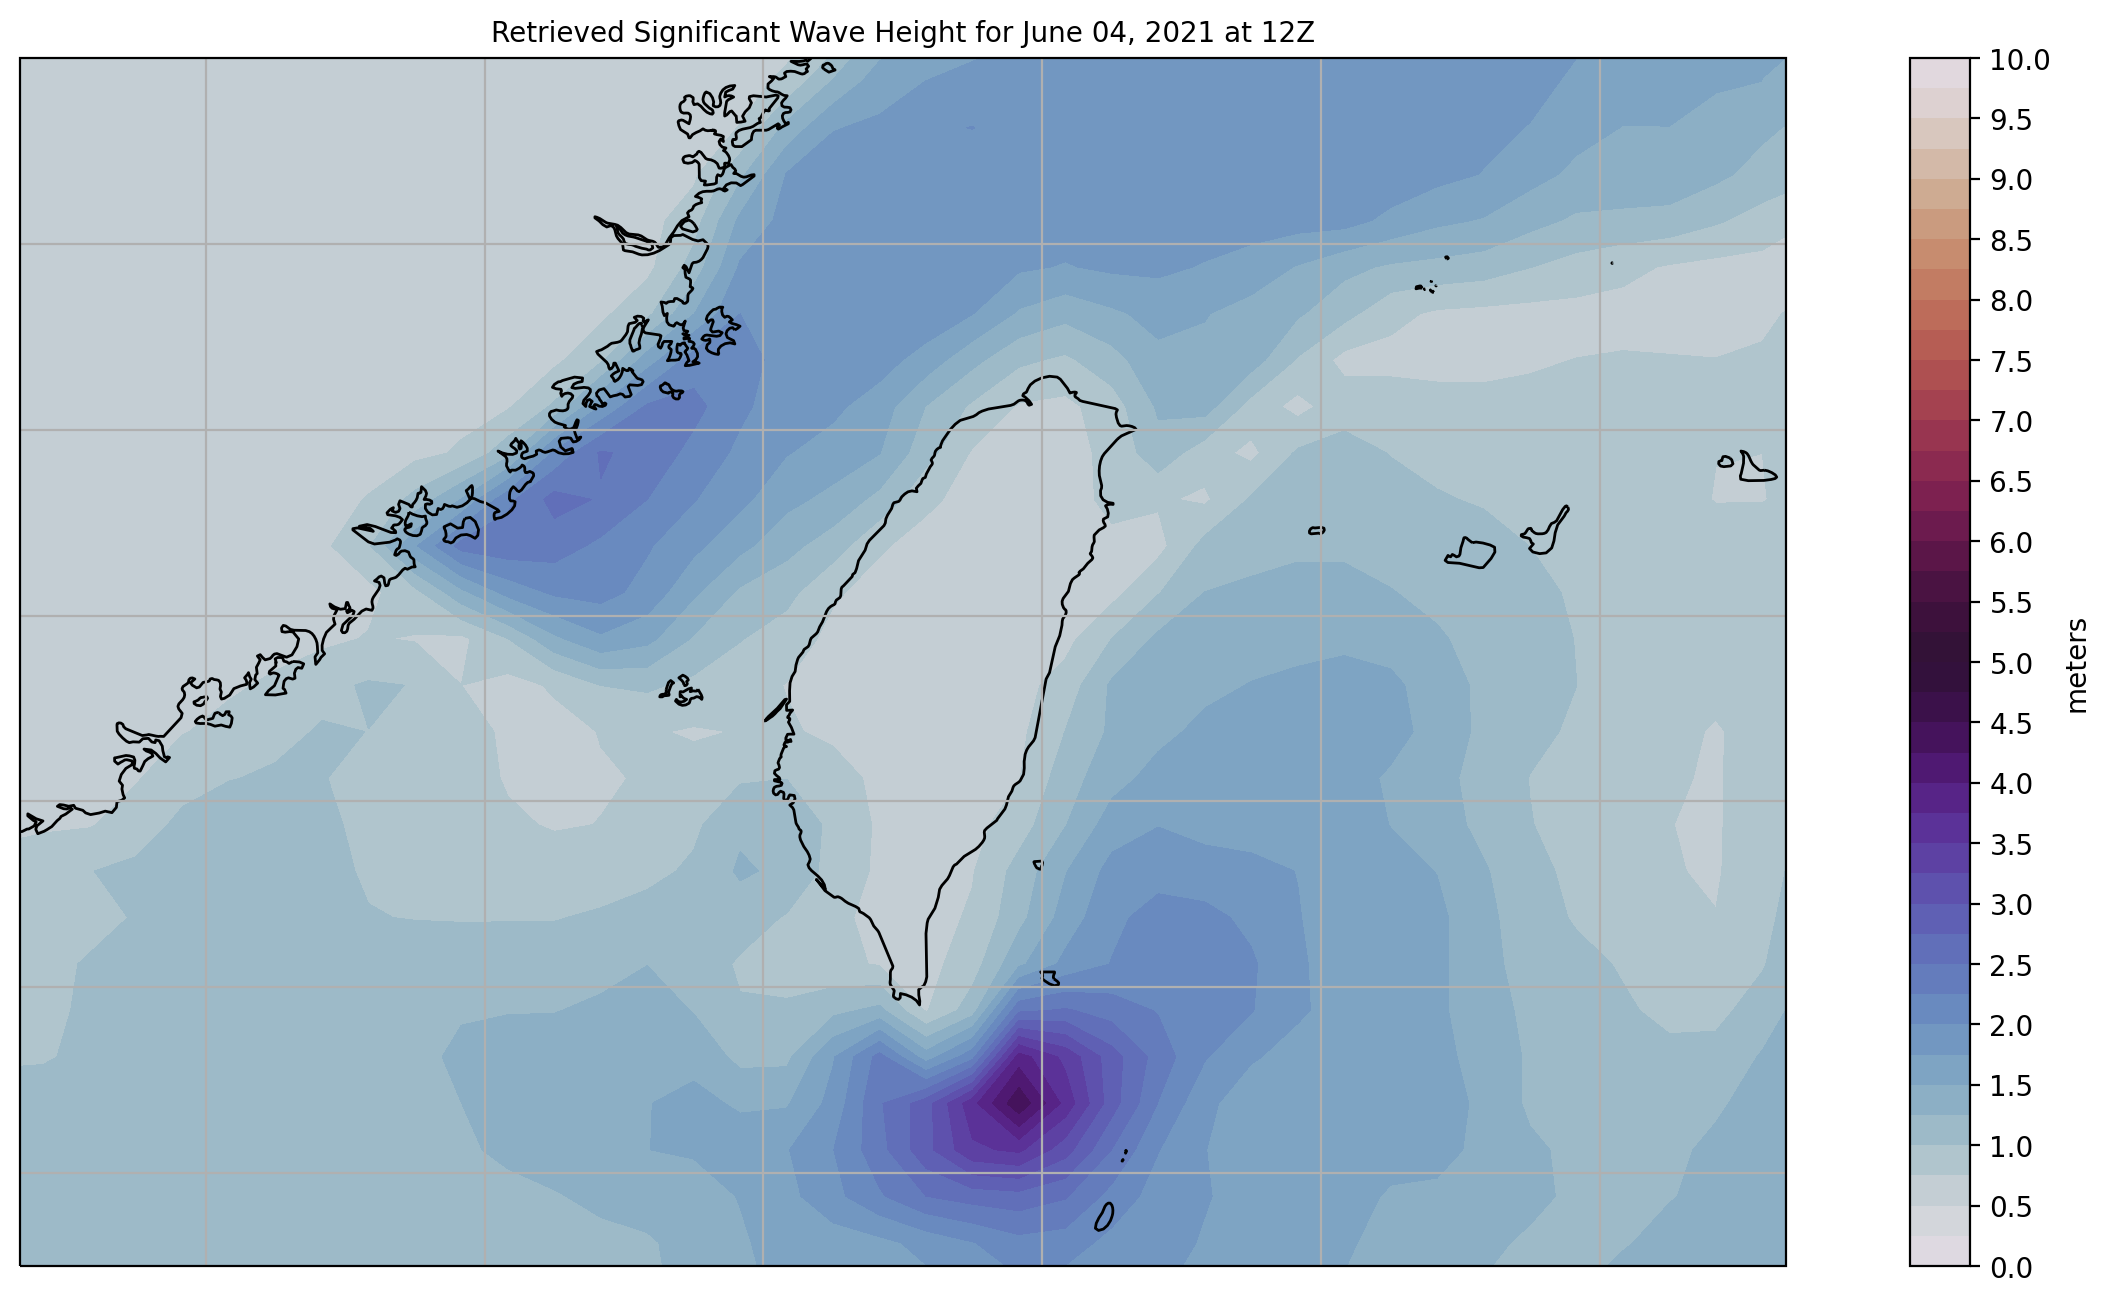

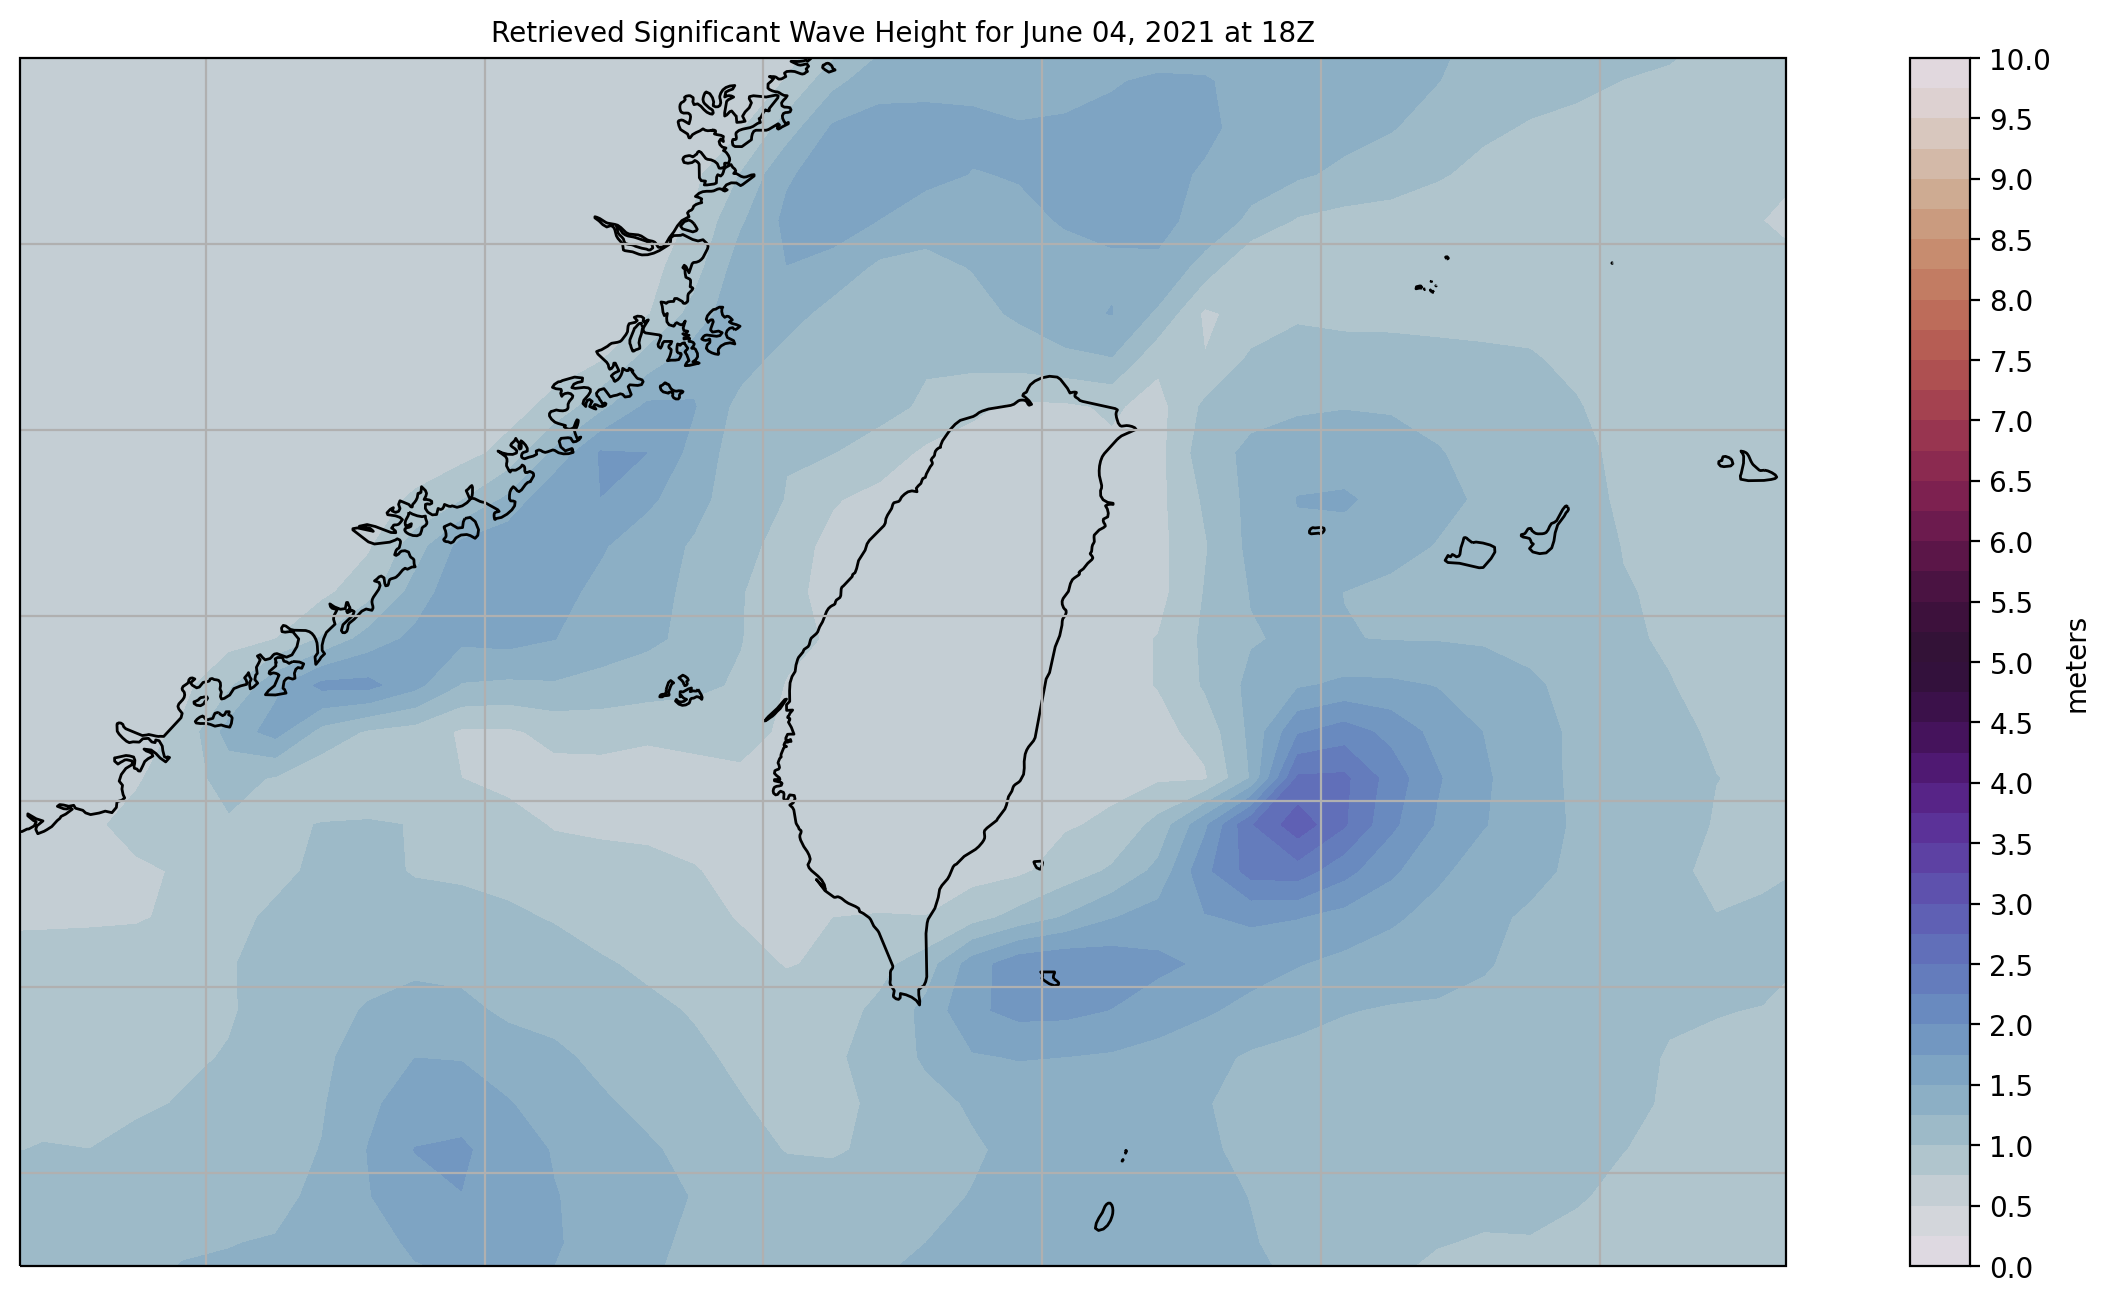

In [17]:
for i in [0,1,2,3]:
    ccmp.plot_H10(str_bdate,ccmp.hours[i],H_DNN,cmap='twilight',subfix='_dnn_oswp')

### Linear

In [18]:
def Vmsat2H(Vmsat):
    Vm = linear_model.predict(pd.DataFrame(Vmsat))
    #Vm = dnn_model.predict(pd.DataFrame(Vmsat))
    #Vm = dnn_model_s2.predict(dnn_model_s1.predict(Vmsat))
    return Vm

In [19]:
H_DNN = get_Vms_obs(str_bdate,str_edate)

v02.1.NRT/Y2021/M06/CCMP_RT_Wind_Analysis_20210604_V02.1_L3.0_RSS.nc
113040/113040 [==============================] - 168s 1ms/step


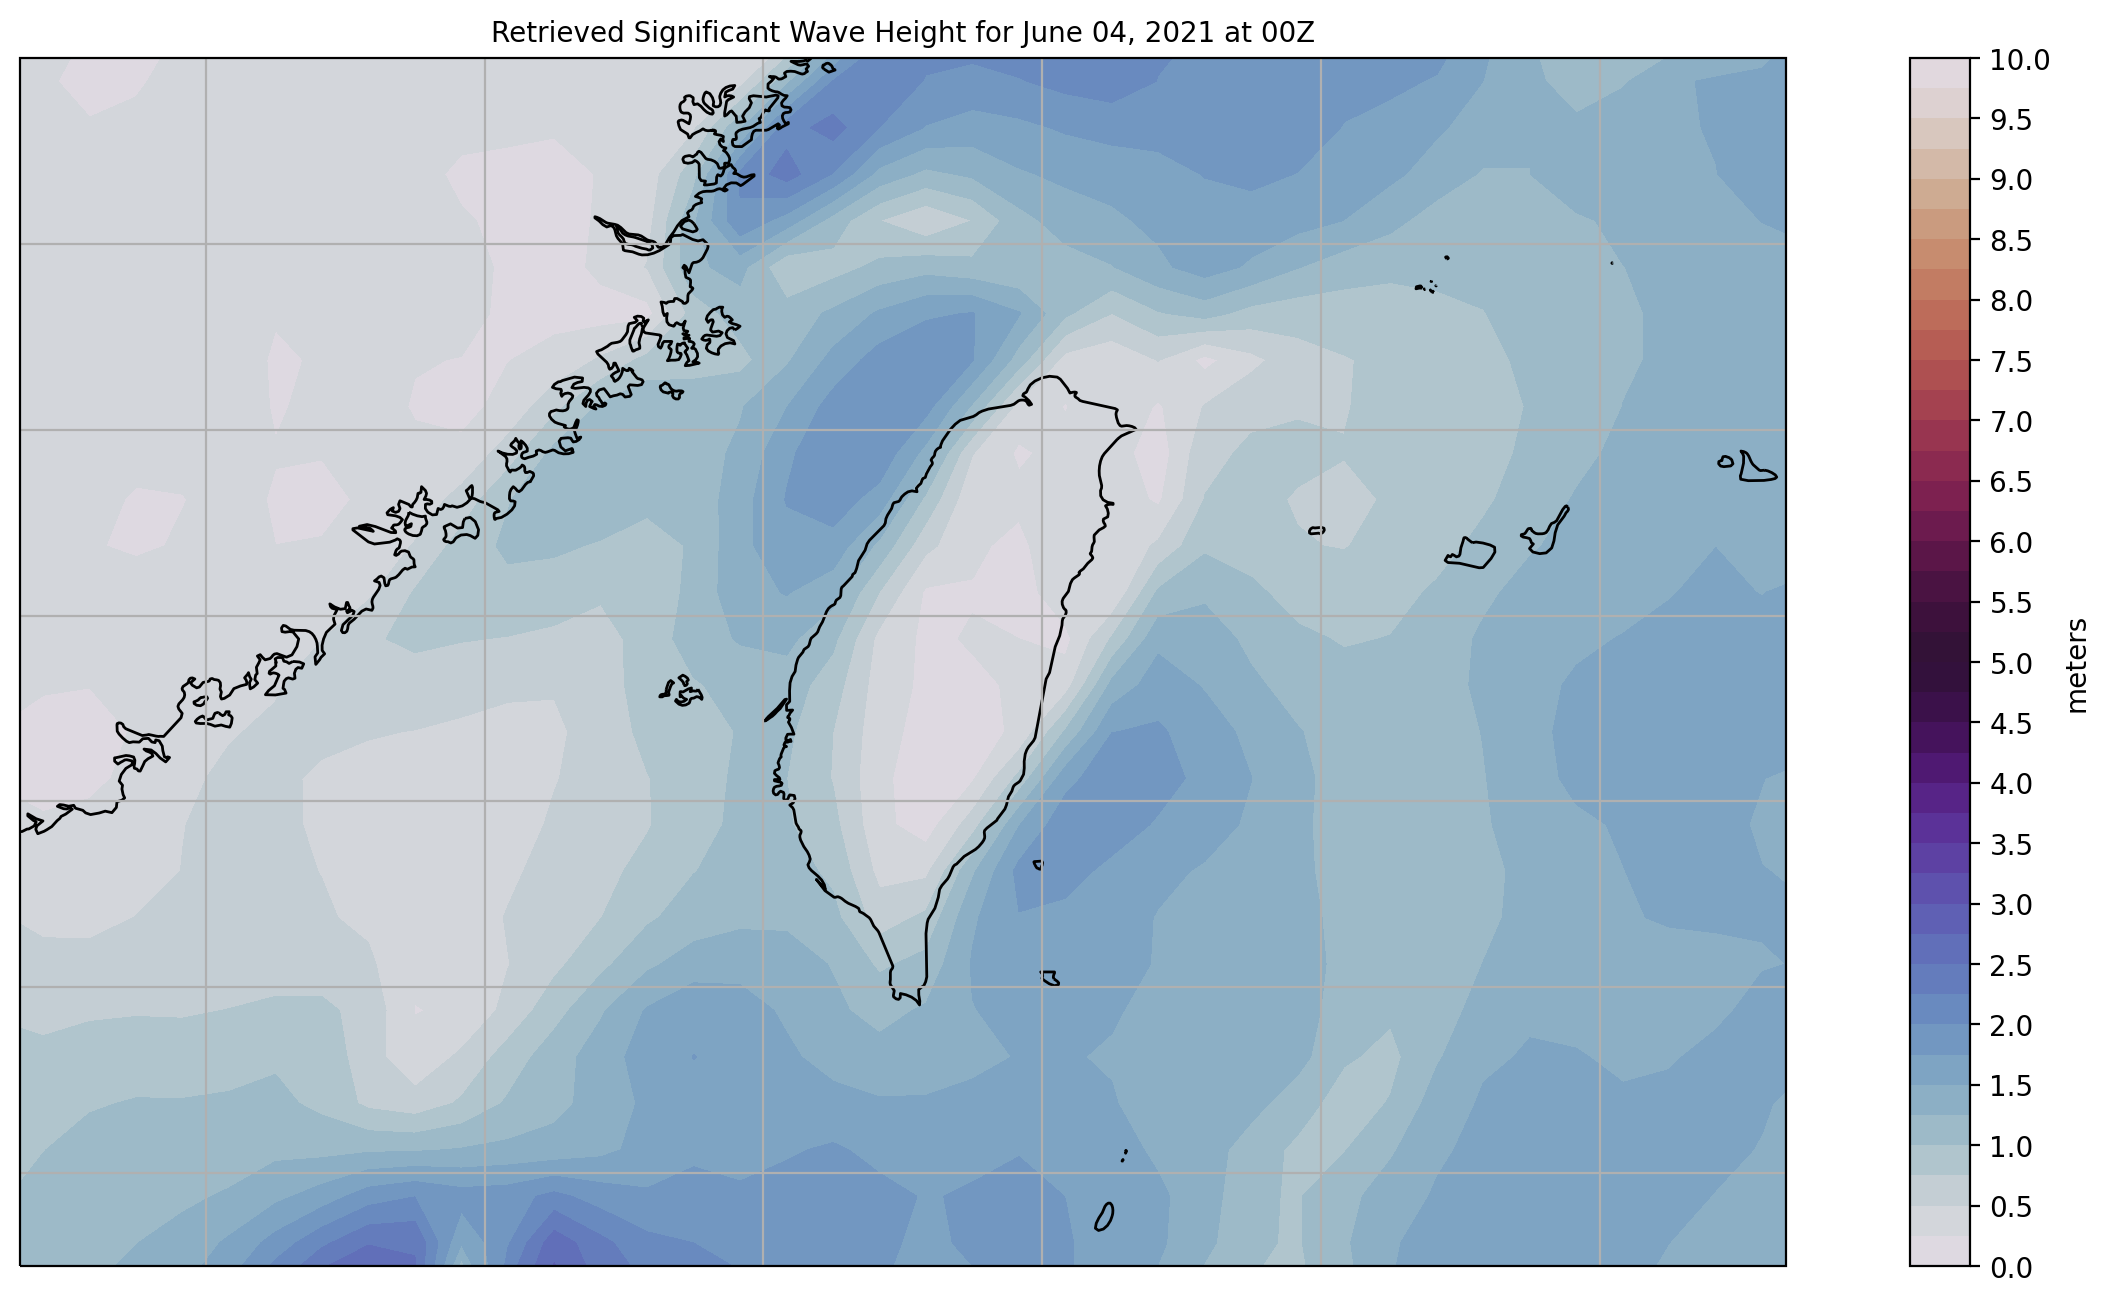

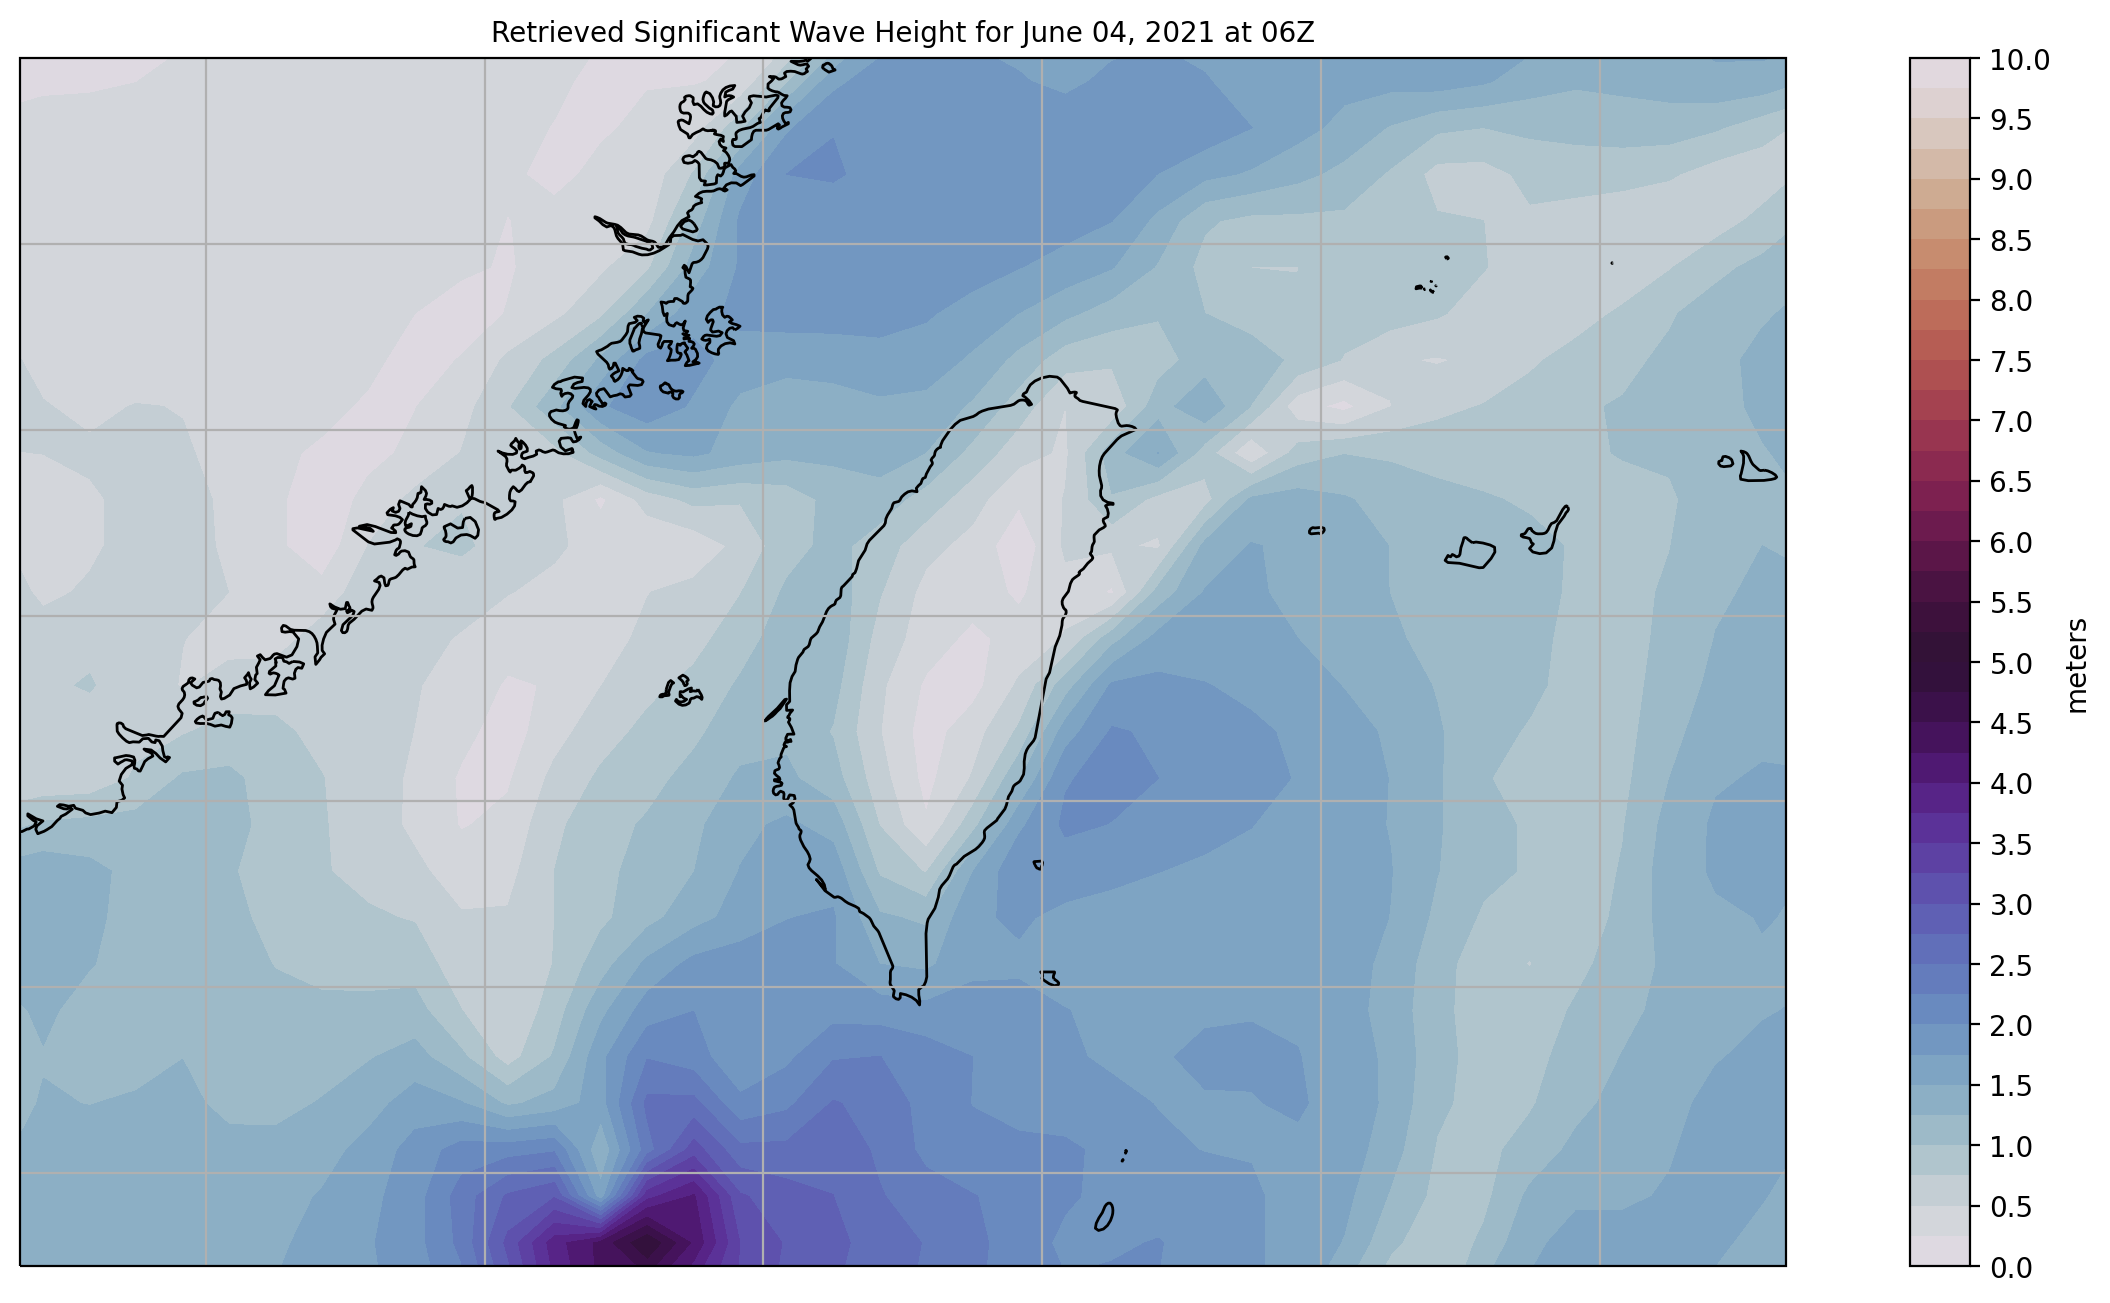

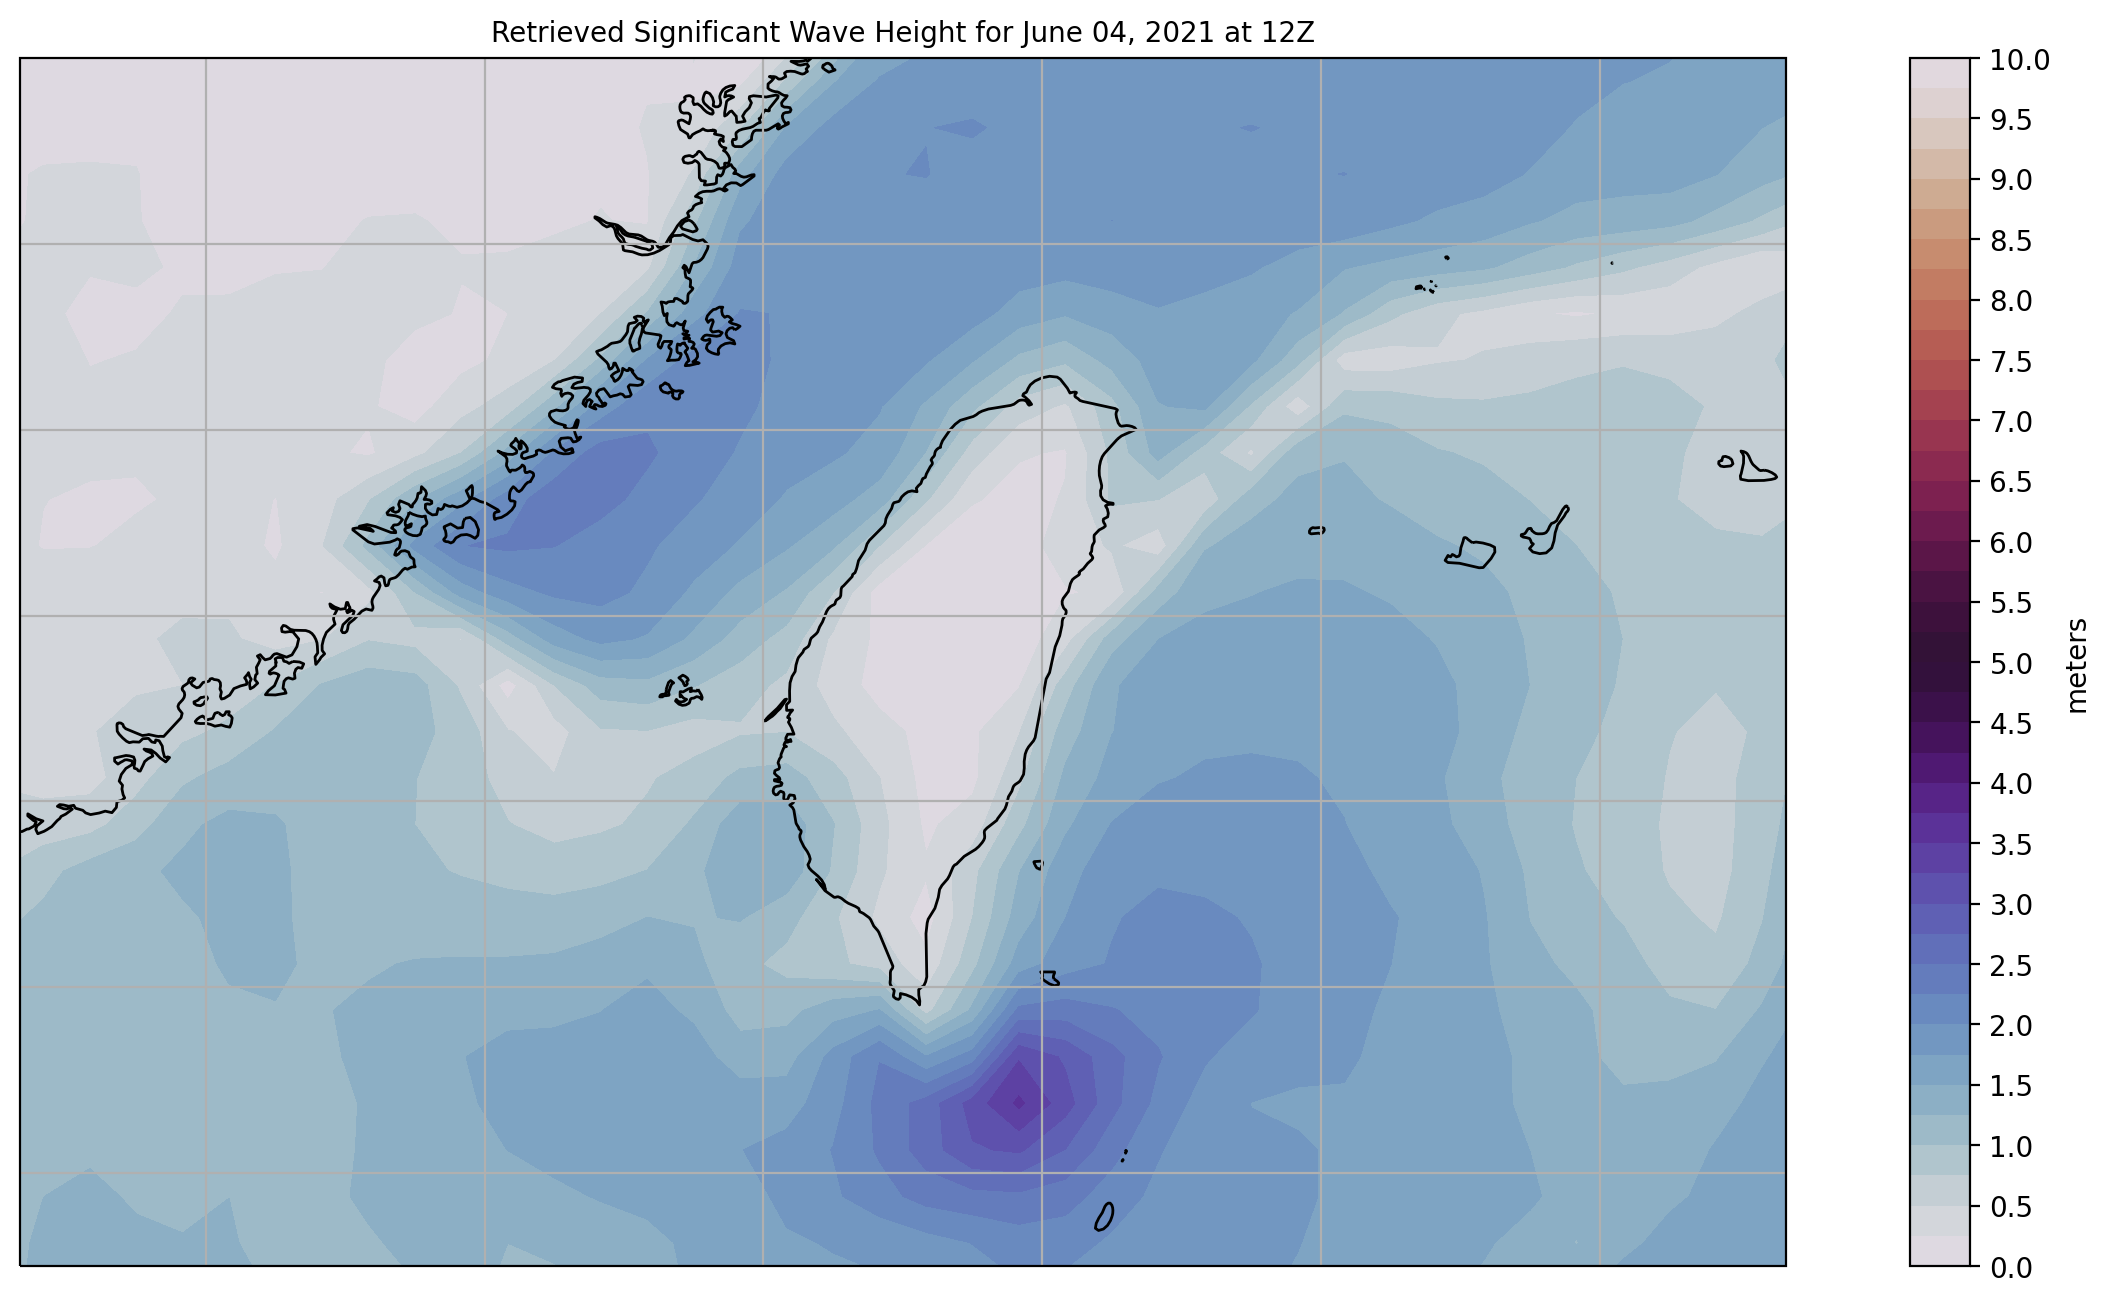

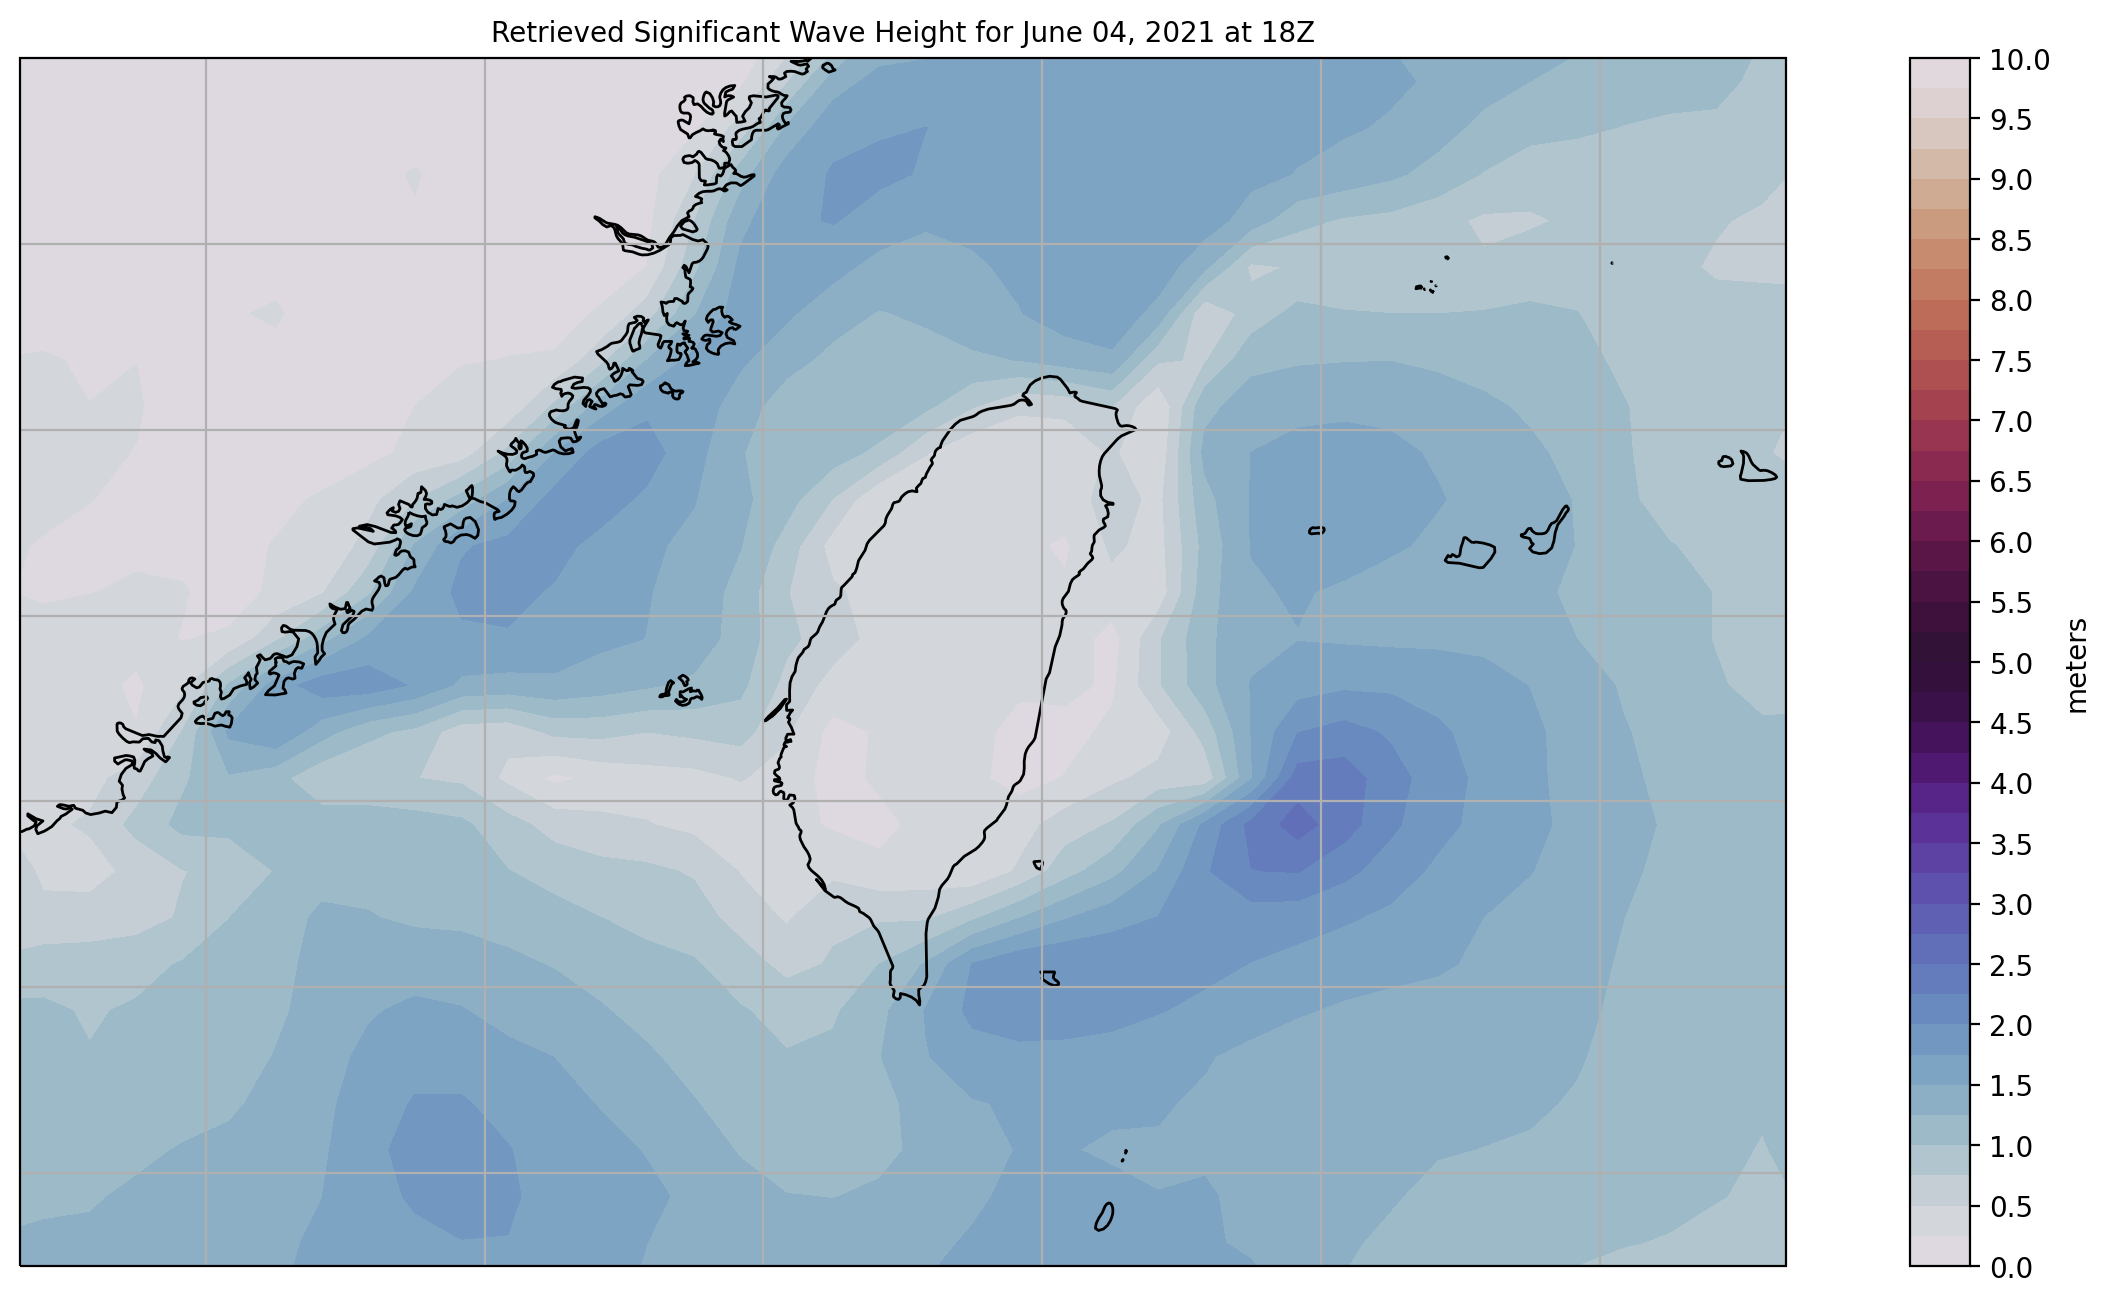

In [20]:
for i in [0,1,2,3]:
    ccmp.plot_H10(str_bdate,ccmp.hours[i],H_DNN,cmap='twilight',subfix='_linear')

In [ ]:
linear_model = tf.keras.models.load_model('../ai/saved_model/Vmsat_H_linear_model')
dnn_model    = tf.keras.models.load_model('../ai/saved_model/Vmsat_H_ddn_model')
dnn_model_s1 = tf.keras.models.load_model('../ai/saved_model/Vmsat_Vm_ddn_model')
dnn_model_s2 = tf.keras.models.load_model('../ai/saved_model/Vm_H_ddn_Vm_model')

# Check its architecture
linear_model.summary()
dnn_model.summary()
dnn_model_s1.summary()
dnn_model_s2.summary()

In [ ]:
for i in [0,1,2,3]:
    ccmp.plot_H10(str_bdate,ccmp.hours[i],(H10adj-H10),cmap='twilight',subfix='_Hdiff',vmax=0.001,vmin=-0.15,interval=0.005)